In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
from collections import Counter
import networkx as nx

In [2]:
SHOW_ID = 0
TYPE = 1
TITLE = 2
DIRECTOR = 3
CAST = 4
COUNTRY = 5
DATE_ADDED = 6
RELEASE_YEAR = 7
RATING = 8
DURATION = 9
LISTED_IN = 10
DESCRIPTION = 11

In [3]:
with open("netflix_dataset.csv", "r", encoding="utf8") as file:
    netflix_dataset_list = list(csv.reader(file))
    netflix_dataset_list.remove(netflix_dataset_list[0])

Функція обрахування кількості об'єктів за типом

In [4]:
def len_type(data):
    quontity = [x[TITLE] for x in netflix_dataset_list if x[TYPE] == data]
    return len(quontity)

Функції роботи з даними словника

In [5]:
def get_keys(data):
    return list(data.keys())


def get_values(data):
    return list(data.values())

Функції сортування та фільтрування даних

In [6]:
def key_data_sort(dict_data):
    return dict(sorted(dict_data.items(), key=lambda x: x[0]))


def values_data_sort(dict_data):
    return dict(sorted(dict_data.items(), key=lambda x: x[1]))


def filter_dict(data,value):
    filtered_dict = dict(filter(lambda item: item[1] > value, data.items()))
    return filtered_dict

Функції графічного відображення даних

In [7]:
def two_bar_chart(x_size, y_size, dict_data, name_y1, name_y2):
    fig, ax = plt.subplots(figsize=(x_size, y_size))
    
    x_axis = get_keys(dict_data)
    index = np.arange(len(x_axis))
    
    y_axis1 = [dict_data[x].get(name_y1, 0) for x in dict_data]
    y_axis2 = [dict_data[x].get(name_y2, 0) for x in dict_data]
    
    bw = 0.3

    print(f"{name_y1} - blue, {name_y2} -green")
    plt.bar(index, y_axis1, bw, color='b')
    plt.bar(index+bw, y_axis2, bw, color='g')
    plt.xticks(index+1.5*bw,x_axis)
    return plt.show()

def show_bar(data, x_size,y_size):
    x_axis = np.array(get_keys(data))
    y_axis = np.array(get_values(data))
    
    fig, ax = plt.subplots(figsize=(x_size, y_size))
    
    plt.bar(x_axis,y_axis)
    plt.show()
    
def linear_functions(data):
    df = pd.DataFrame(data)
    df_transposed = df.transpose()
    ax = df_transposed.plot(figsize=(25, 15))
    ax.set_xticks(range(len(df_transposed.index)))
    ax.set_xticklabels(df_transposed.index, rotation=90)
    plt.show()

def mindmap(data):
    G = nx.Graph()
    
    for director, actors in data.items():
        for actor in actors:
            G.add_edge(director, actor)
    
    plt.figure(figsize=(30, 20))
    nx.draw(G, with_labels=True, node_size=1000, font_size=5, node_color='lightblue')
    plt.show()

Функція обєднання багатьох списків в один

In [8]:
def flat(input_list):
    def flat_internal(flatten_list, elem):
        if not (isinstance(elem, list) or isinstance(elem, tuple)):
            flatten_list.append(elem)
            return

        for it in elem:
            if not (isinstance(it, list) or isinstance(it, tuple)):
                flatten_list.append(it)
            else:
                flat_internal(flatten_list, it)

    res = []

    for i in input_list:
        flat_internal(res, i)

    return res

Функції для роботи з словниками

In [9]:
def nested_dictionaries(data_base, info, info1):
    if info not in data_base:
        data_base[info] = {x[info1]: 1}
    elif x[info1] not in data_base[info]:
        data_base[info][x[info1]] = 1
    else:
        data_base[info][x[info1]] += 1

    
def simple_dict(data_base, info):
    if info not in data_base:
        data_base[info] = 1
    else:
        data_base[info] += 1


def count_dict_values(index):
    persons = [x[index].split(", ") for x in netflix_dataset_list if len(x[index]) != 0]
    one_list_persons = sorted(flat(persons))
    counted_persons = dict(Counter(one_list_persons))
    return counted_persons


def heavy_dict(index, data, info):
    if index not in data:
        data[str(index)] = []
        data[str(index)].extend(info)
    else:
        data[str(index)].extend(info)
        
        
def nested_calculated(data):
    genres_year_calculated = {}
    for genre, values in data.items():
        genres_year_calculated[genre] = dict(Counter(values))
    return genres_year_calculated
    
    
def simple_info_dict(data, info, value_added):
    if info not in data:
        data[info] = [value_added]
    else:
        data[info].append(value_added)

1.1 Examine the distribution of movies vs. TV shows.
Як бачимо фільмів випущено майже у два рази більше

Q of Movies: 6131, Q of TV Shows: 2676


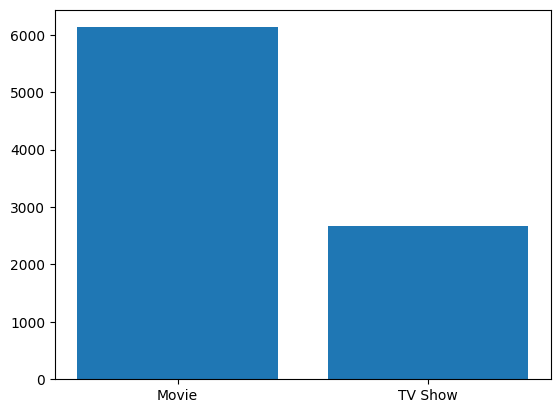

In [10]:
q_of_movies = len_type("Movie")
q_of_shows = len_type("TV Show")

print(f"Q of Movies: {q_of_movies}, Q of TV Shows: {q_of_shows}")

x_axis_names = np.array(["Movie", "TV Show"])
y_axis_values = np.array([q_of_movies, q_of_shows])
plt.bar(x_axis_names,y_axis_values)
plt.show()

1.2 Analyze trends over time in the type of content being added to Netflix.
Через більший випуск фільмів, досить очікувано, що у нетфлікс їх додають теж більше чим у два рази більше за серіали

Movie - blue, TV Show -green


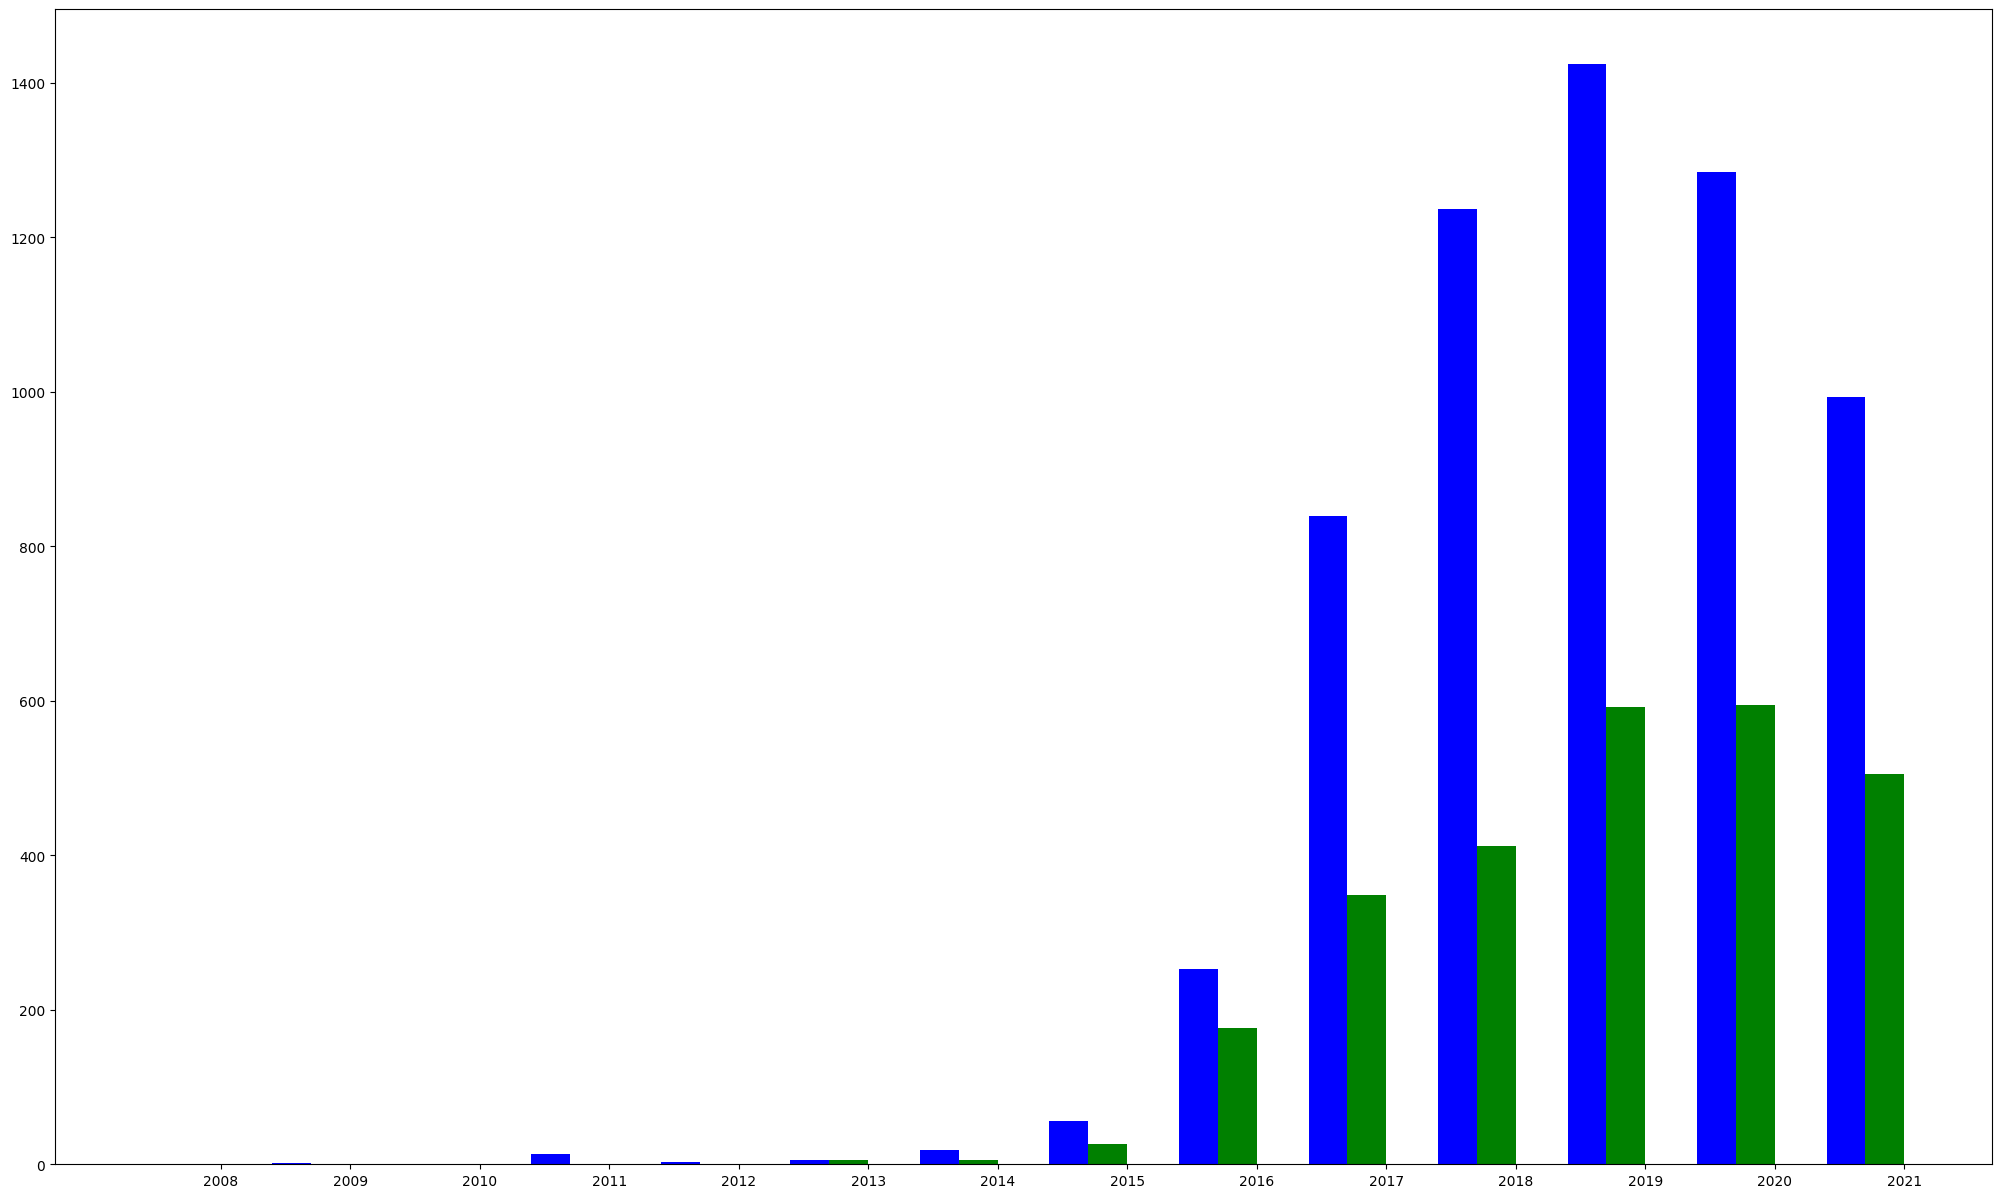

In [11]:
time_added = {}
for x in netflix_dataset_list:
    if len(x[TYPE]) != 0 and len(x[DATE_ADDED]) != 0:
        year_added = x[DATE_ADDED].split(', ')
        nested_dictionaries(time_added, year_added[1], TYPE)

sorted_time_added = key_data_sort(time_added)
# print(sorted_time_added)

two_bar_chart(25, 15, sorted_time_added, "Movie", "TV Show")

2.1 Investigate the distribution of content by release year.
Знову ж таки, досить очікувана картина, що у рік фільмів випускається більше ніж серіалів, але у 2021 ця логіка ламається, серіалів випустили більше

Movie - blue, TV Show -green


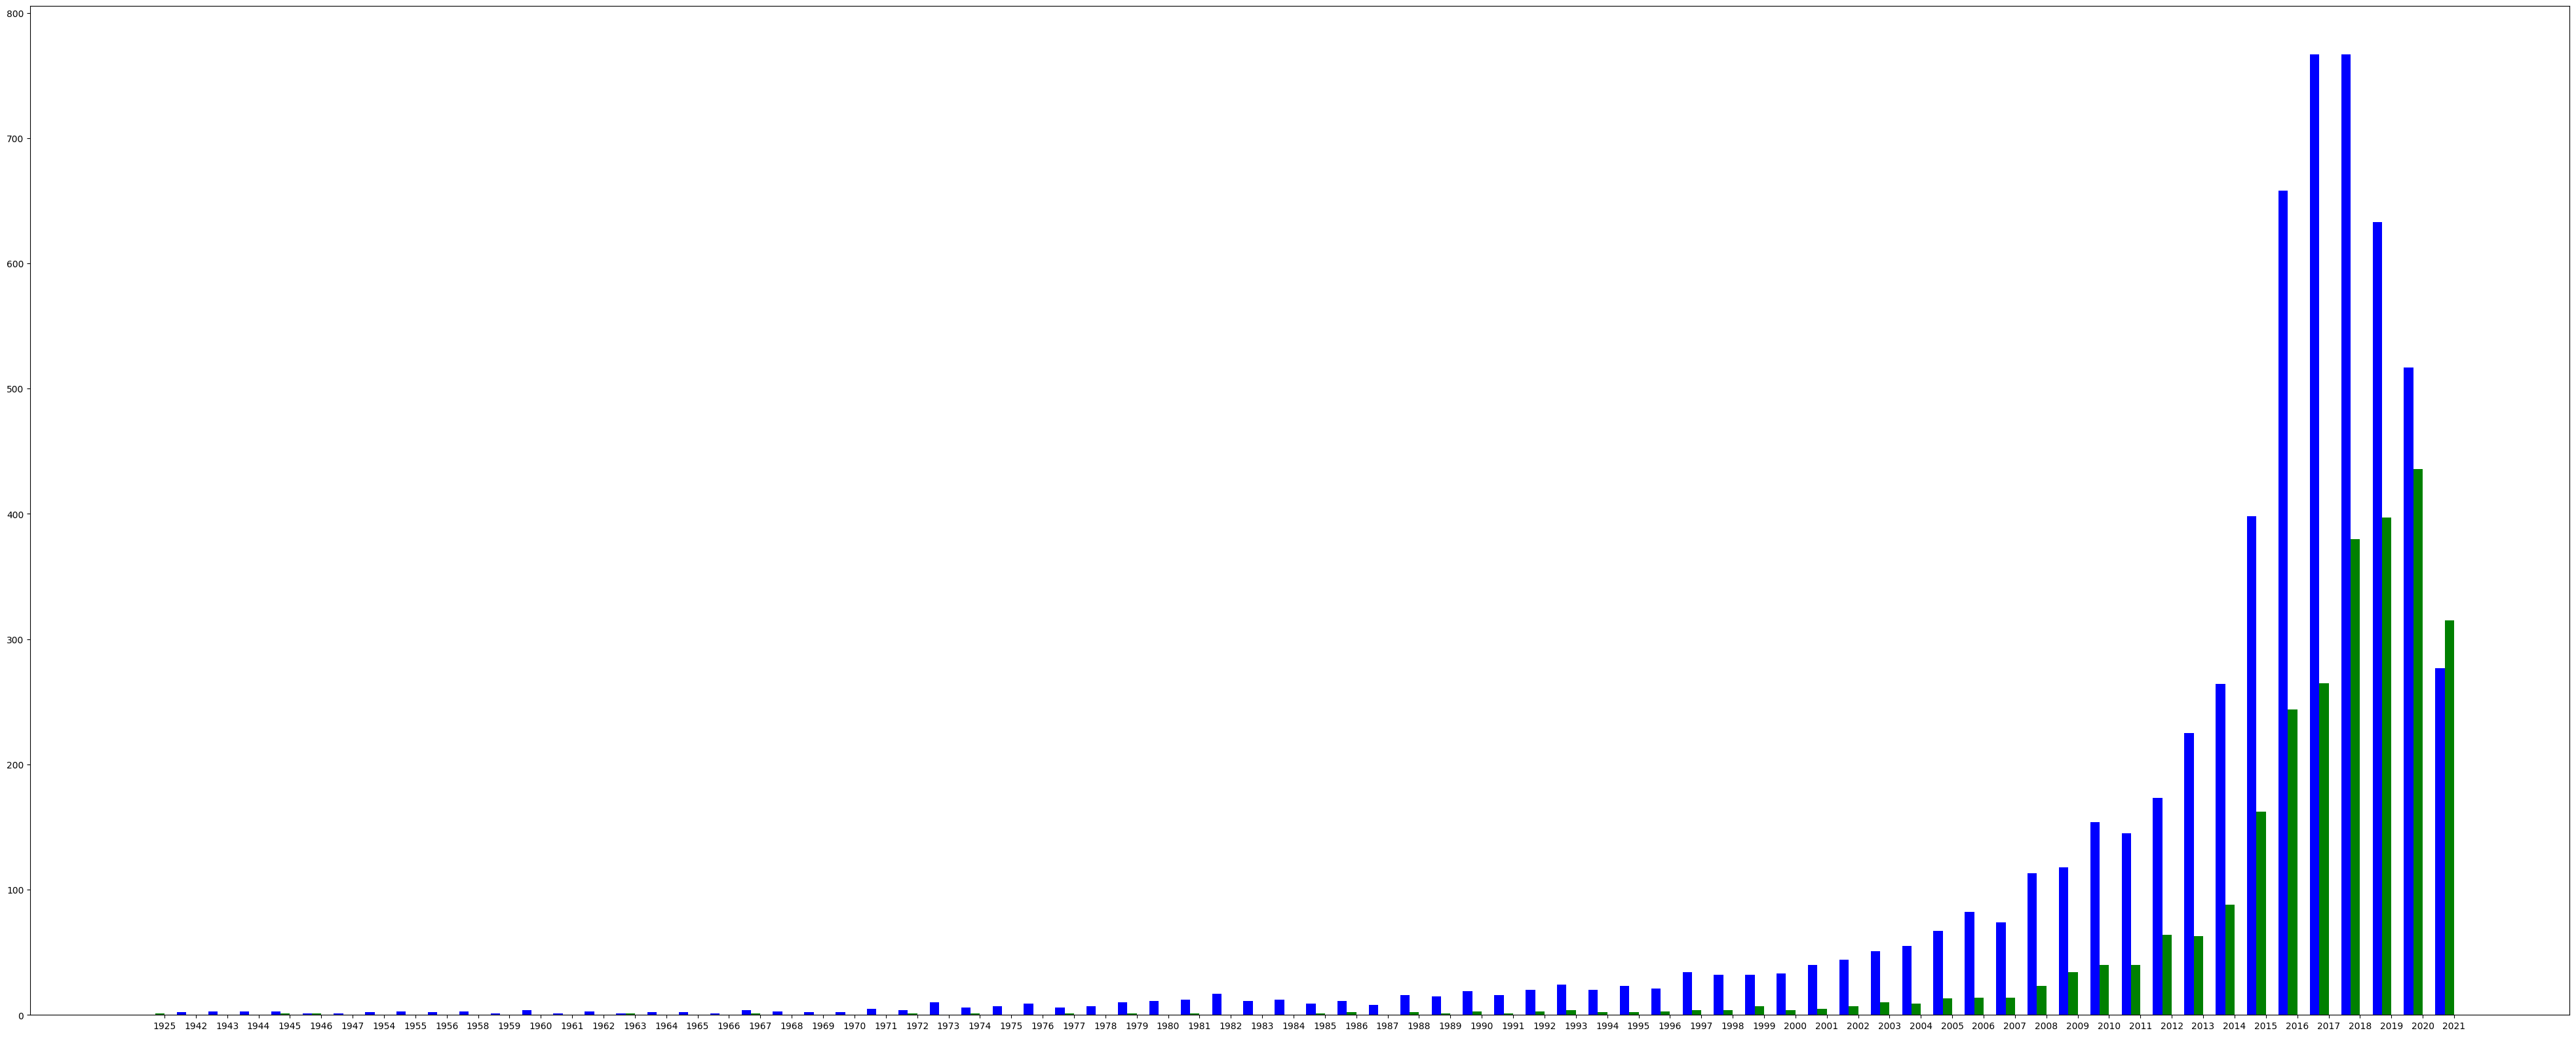

In [12]:
#2.1
year_distribution = {}
for x in netflix_dataset_list:
    if len(x[TYPE]) != 0 and len(x[RELEASE_YEAR]) != 0:
        nested_dictionaries(year_distribution, x[RELEASE_YEAR], TYPE)

sorted_year_distribution = key_data_sort(year_distribution)
# print(sorted_year_distribution)

two_bar_chart(50, 20, sorted_year_distribution, "Movie", "TV Show")

2.2 Identify trends in the production of new content over the years.
Бачимо, що пік випуску контенту припав на 2018, судячи з досвіду попередніх років, кількість у наступні роки мала б тільки рости, але ймовірно через covid-19 маємо спад.

Випуск контенту за конкретний рік


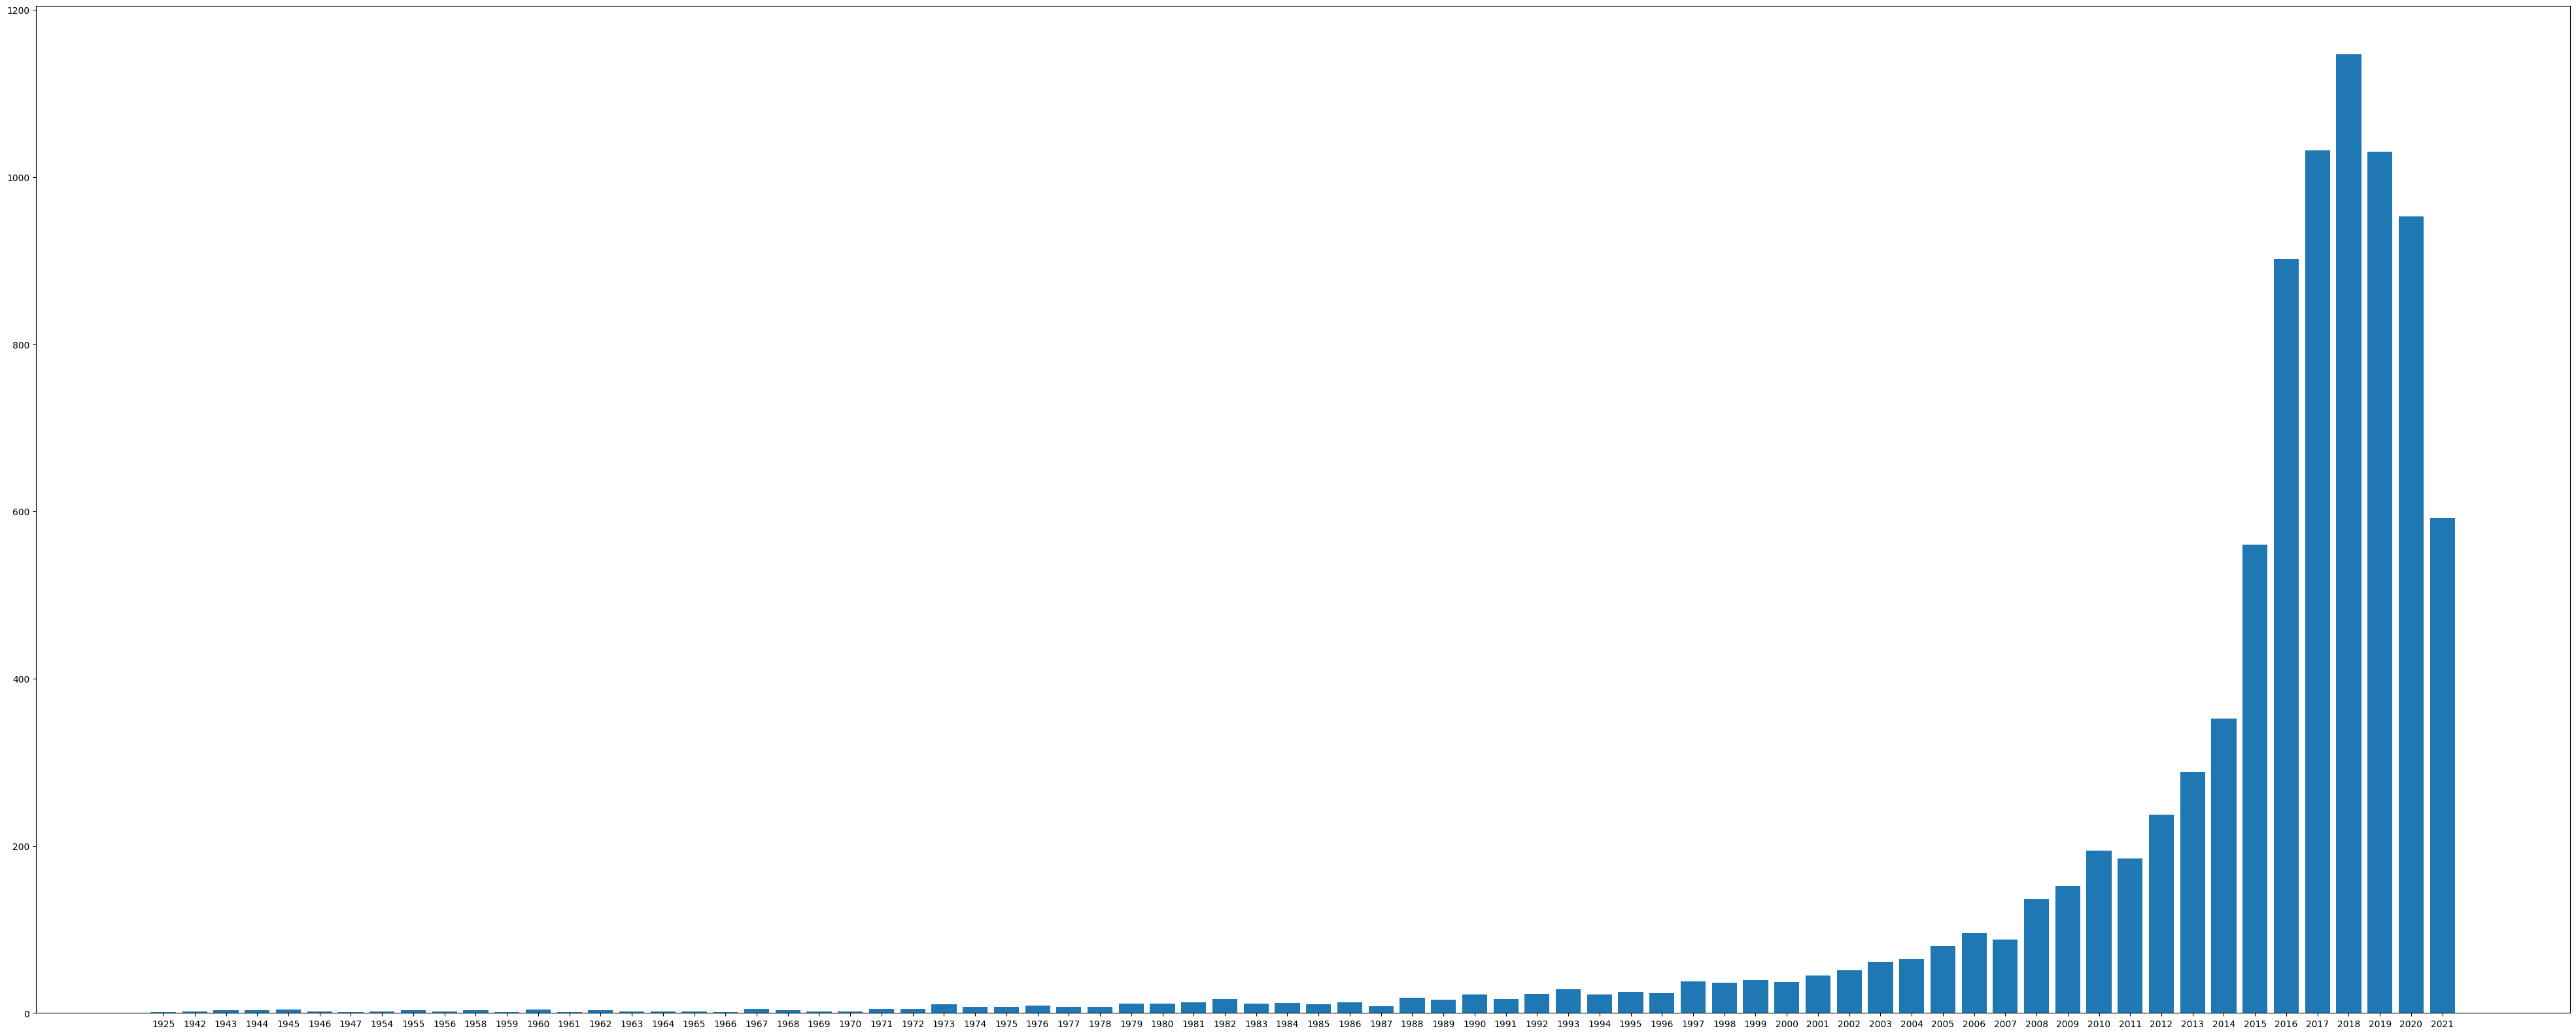

In [13]:
time_trends = {}
for x in netflix_dataset_list:
    if len(x[RELEASE_YEAR]) != 0:
        simple_dict(time_trends, x[RELEASE_YEAR])

filtered_time_trends = key_data_sort(time_trends)
# print(filtered_time_trends)

print("Випуск контенту за конкретний рік")
show_bar(filtered_time_trends, 50, 20)

3.1 Explore the distribution of content by ratings (e.g., G, PG, PG-13, R, etc.).
Найбільше контенту з рейтингом TV-MA, а також можемо прослідкувати логіку, що зазвичай контент приставкою TV має високі цифри

Розподіл кількості фільмів за рейтингами


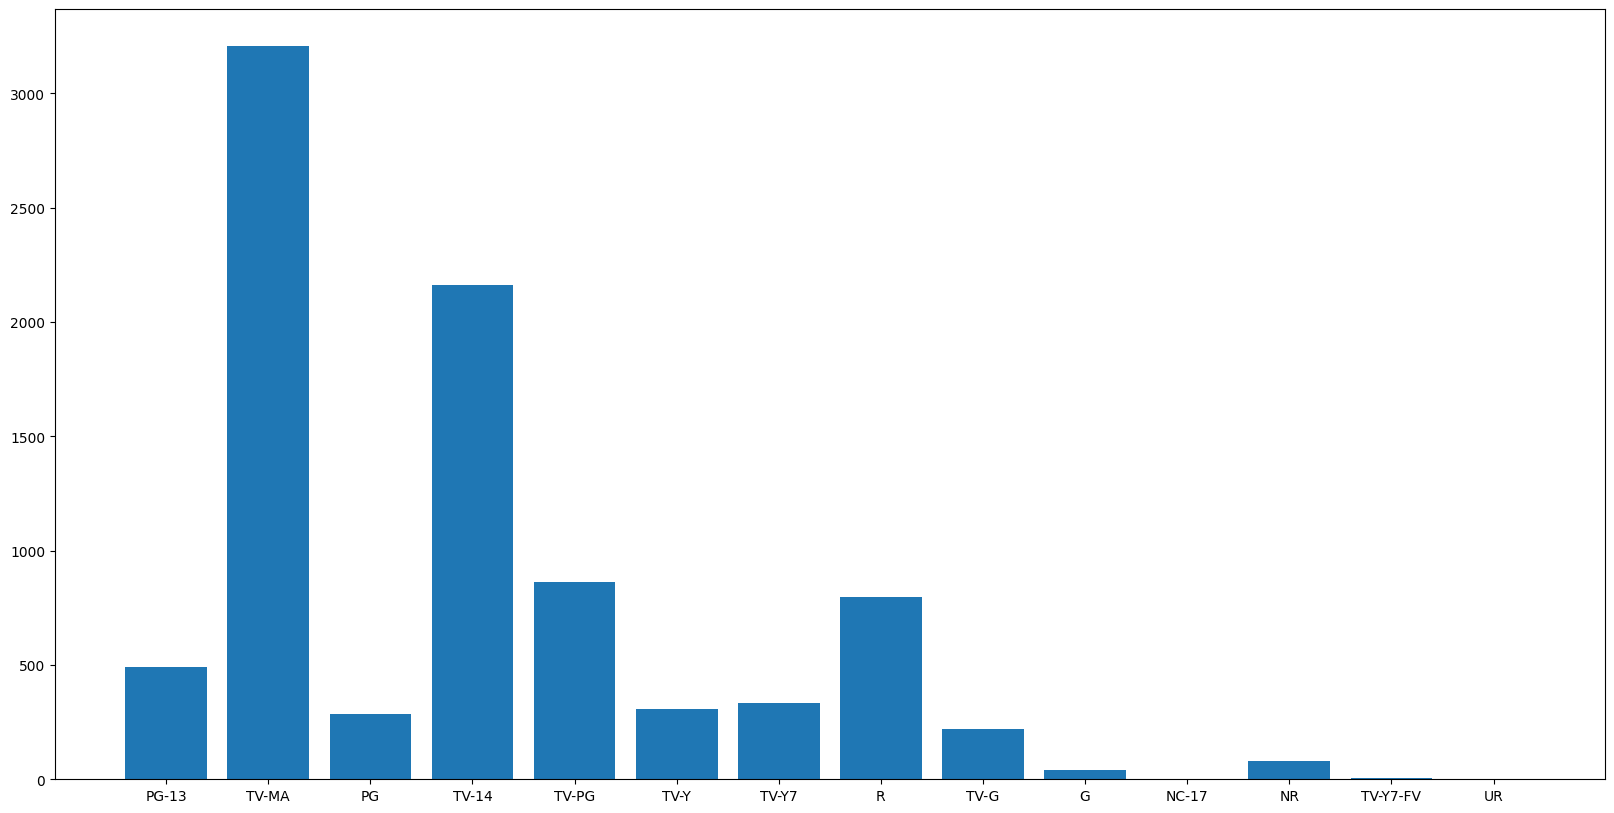

In [14]:
distribution_ratings = {}
for x in netflix_dataset_list:
    if len(x[RATING]) != 0 and "min" not in x[RATING]:
        simple_dict(distribution_ratings, x[RATING])
# print(distribution_ratings)

print("Розподіл кількості фільмів за рейтингами")
show_bar(distribution_ratings, 20, 10)   

3.2 Build the correlation between the entry's Rating & Country
Аналізуючи рейтинги по країнах, бачимо картину, що точки найвищих рейтингів у Америці, зумовлено найбільшою кількістю контенту знатого там.

Кореляція між країною та рейтингами


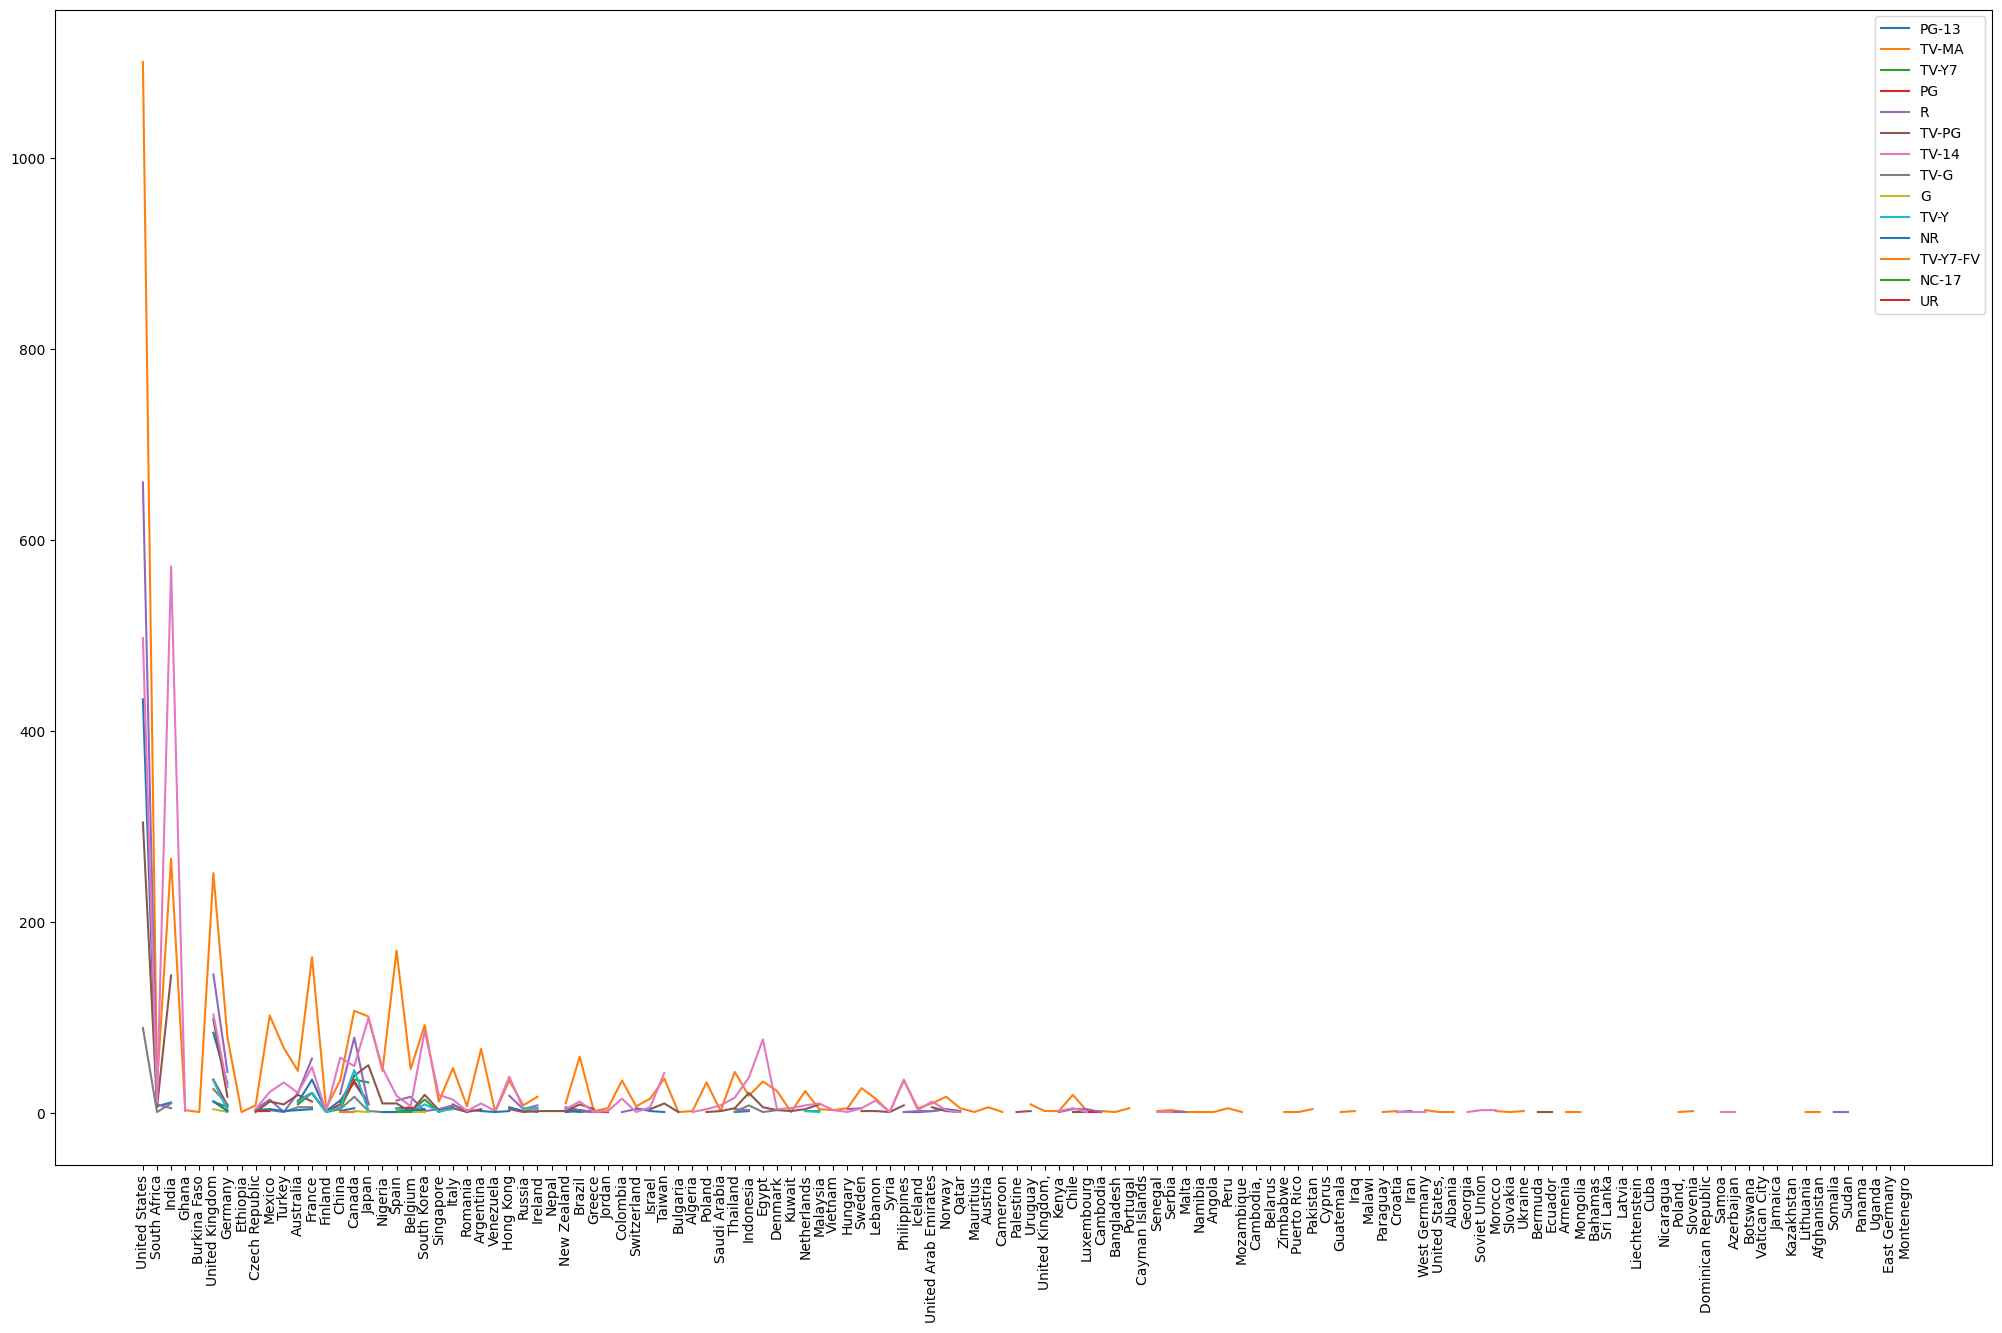

In [15]:
counry_ratings = {}

for x in netflix_dataset_list:
    all_countries = x[5].split(", ")
    for y in all_countries:
        if len(y) != 0 and len(x[8]) != 0 and "min" not in x[8]:
            nested_dictionaries(counry_ratings, y, RATING)
# print(counry_ratings)

print("Кореляція між країною та рейтингами")
linear_functions(counry_ratings)

4.1 Calculate the average duration of movies.
Точково зображено тривалість фільмів, досить очікуваною є середня тривалість близко 100 хвилин

Cиня - кількість фільмів за тривалістю, Червона - середня тривалість фільмів


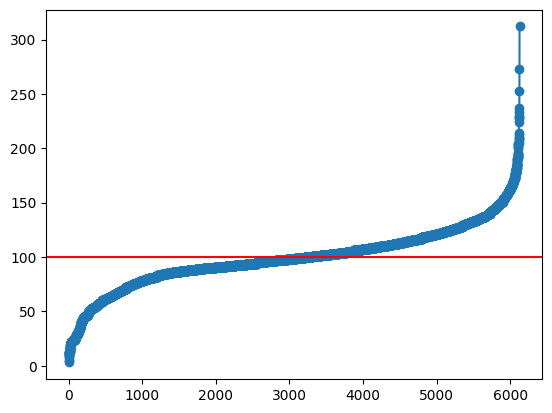

In [16]:
duration_of_films = [int(x[9].replace(" min","")) for x in netflix_dataset_list if x[1] == "Movie" and len(x[1]) != 0 and len(x[9]) != 0]
avarage_time = sum(duration_of_films)/len(duration_of_films)
# print(avarage_time)
sorted_duration_of_films = sorted(duration_of_films)

print("Cиня - кількість фільмів за тривалістю, Червона - середня тривалість фільмів")
all_points = np.array(sorted_duration_of_films)
plt.plot(all_points, marker = 'o')
plt.axhline(y=avarage_time, color='r', linestyle='-')
plt.show()

4.2 Analyze the distribution of TV shows by the number of seasons.
Бачимо, що найбільше серіалів саме односезонних, теж з зрозумілих причин, а серіалів тривалістю 2 сезони майже у чотири рази менше

Розподіл серіалів за кількістю сезонів


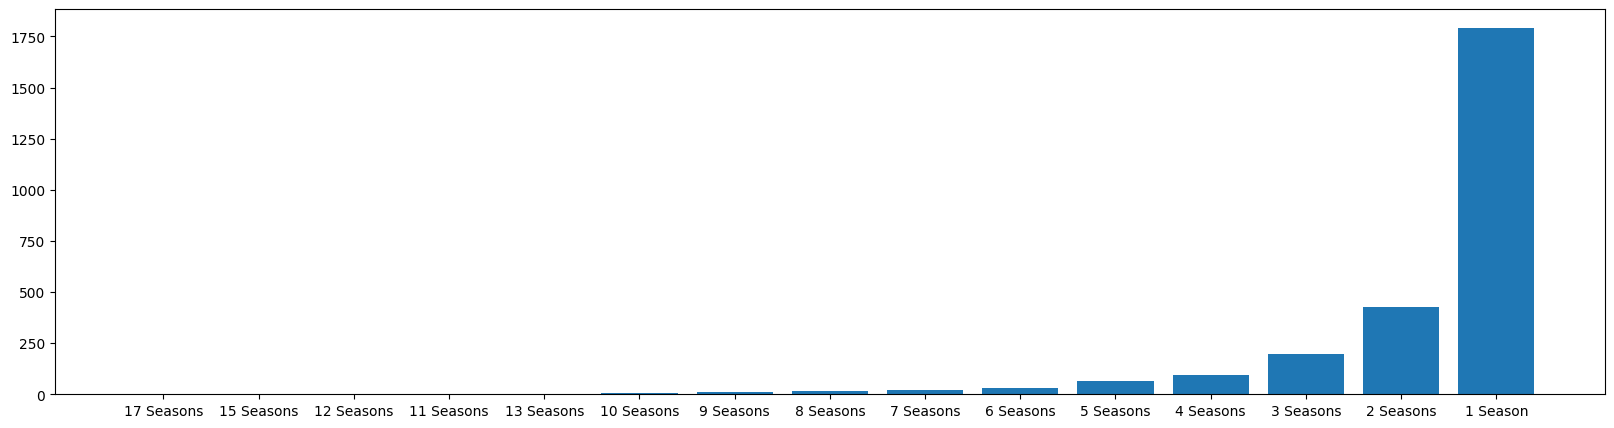

In [17]:
num_of_seasons = {}
for x in netflix_dataset_list:
    if x[TYPE] == "TV Show" and len(x[TYPE]) != 0 and len(x[DURATION]) != 0:
        q_of_seasons = int(x[DURATION].replace("Seasons", "").replace("Season", ""))
        simple_dict(num_of_seasons, x[DURATION])
         
sorted_num_of_seasons = values_data_sort(num_of_seasons)

print("Розподіл серіалів за кількістю сезонів")
show_bar(sorted_num_of_seasons, 20, 5)

5 Assess the volume of content produced by different countries.
З чартів робимо висновок, що найбільше фільмів відзняли у United States, India, United Kindom

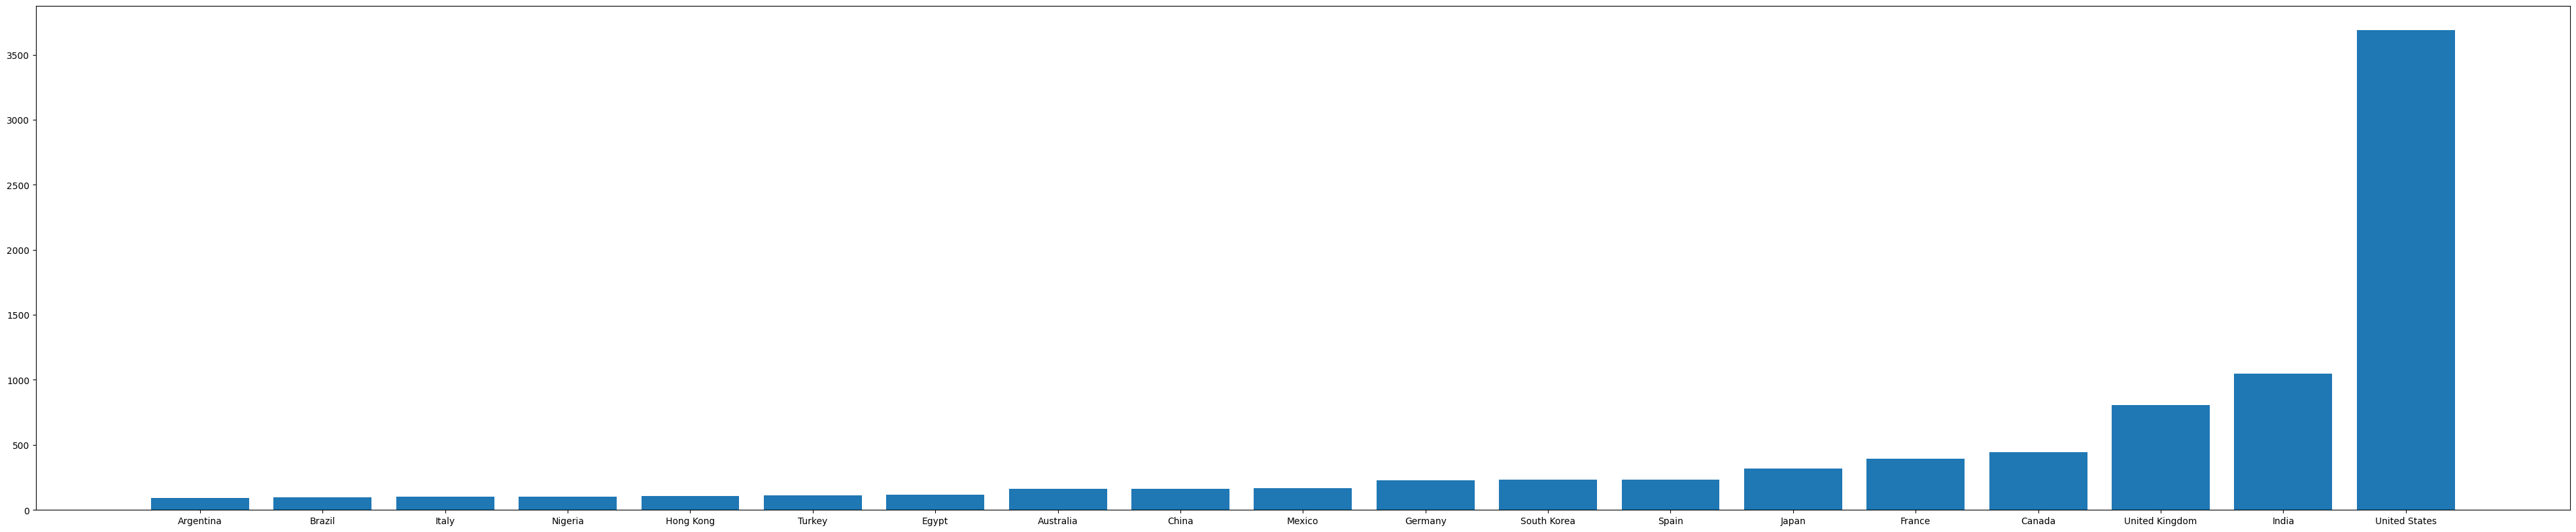

In [18]:
volume_of_countries = {}
for x in netflix_dataset_list:
    all_countries = x[5].split(", ")
    for y in all_countries:
        if len(y) != 0:
            simple_dict(volume_of_countries, y)
# print(volume_of_countries)
sorted_volume = values_data_sort(volume_of_countries)
filtered_volume_of_countries = dict(filter(lambda item: item[1] > 90, sorted_volume.items()))

show_bar(filtered_volume_of_countries, 50, 10)

6.1 Identify directors or cast members with the most titles on Netflix.

!Дані відображені в урізаному форматі для легкого розуміння 
(прогрузити картину повністю можна забравши функцію "filter_dict")

Відображені найпопулярніші актори та продюсери

TOP Directors:


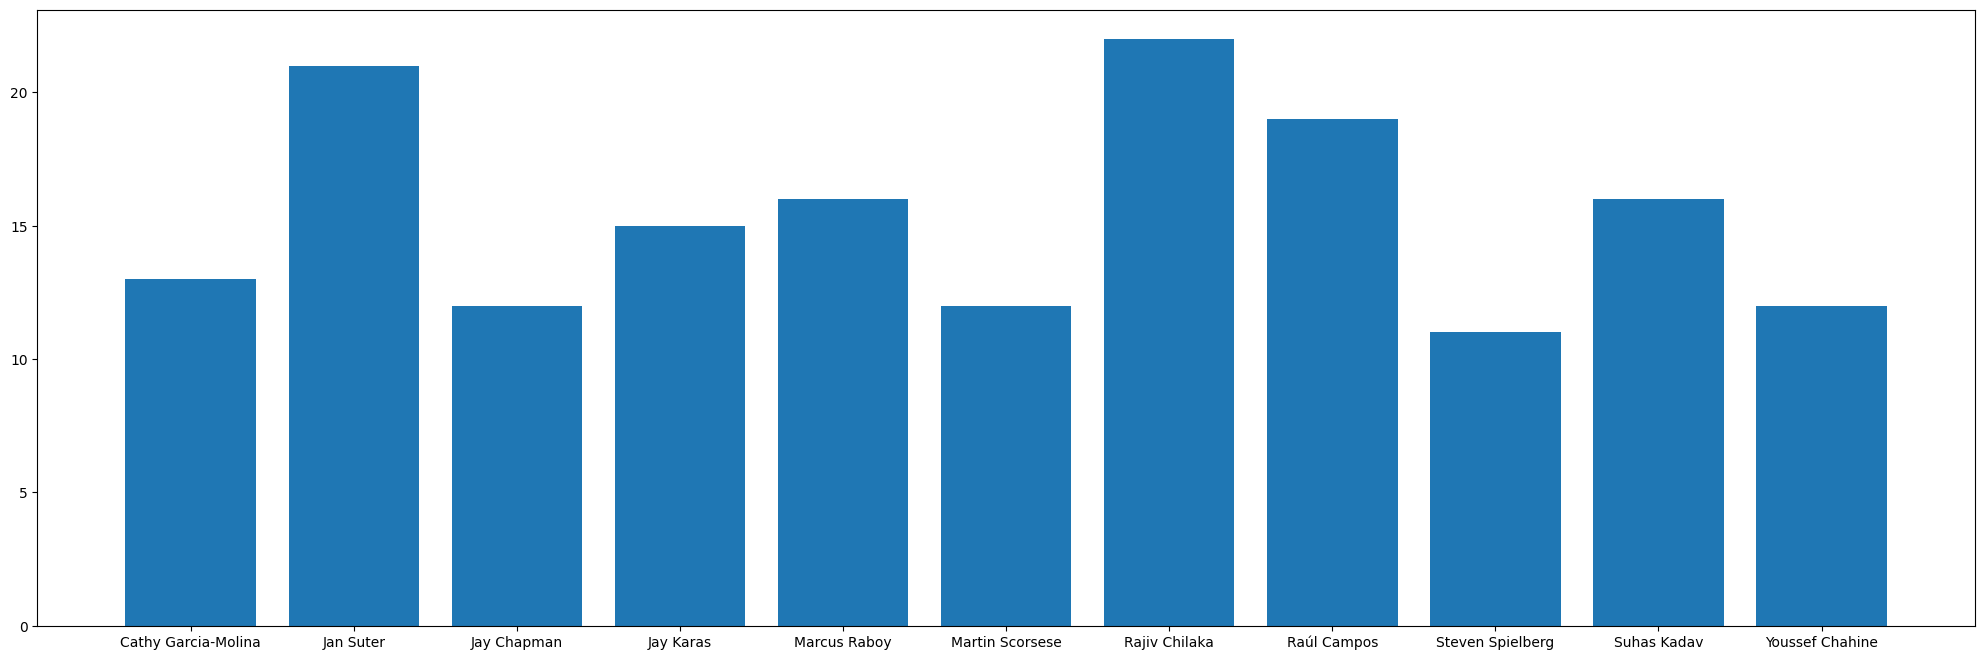

TOP Actors:


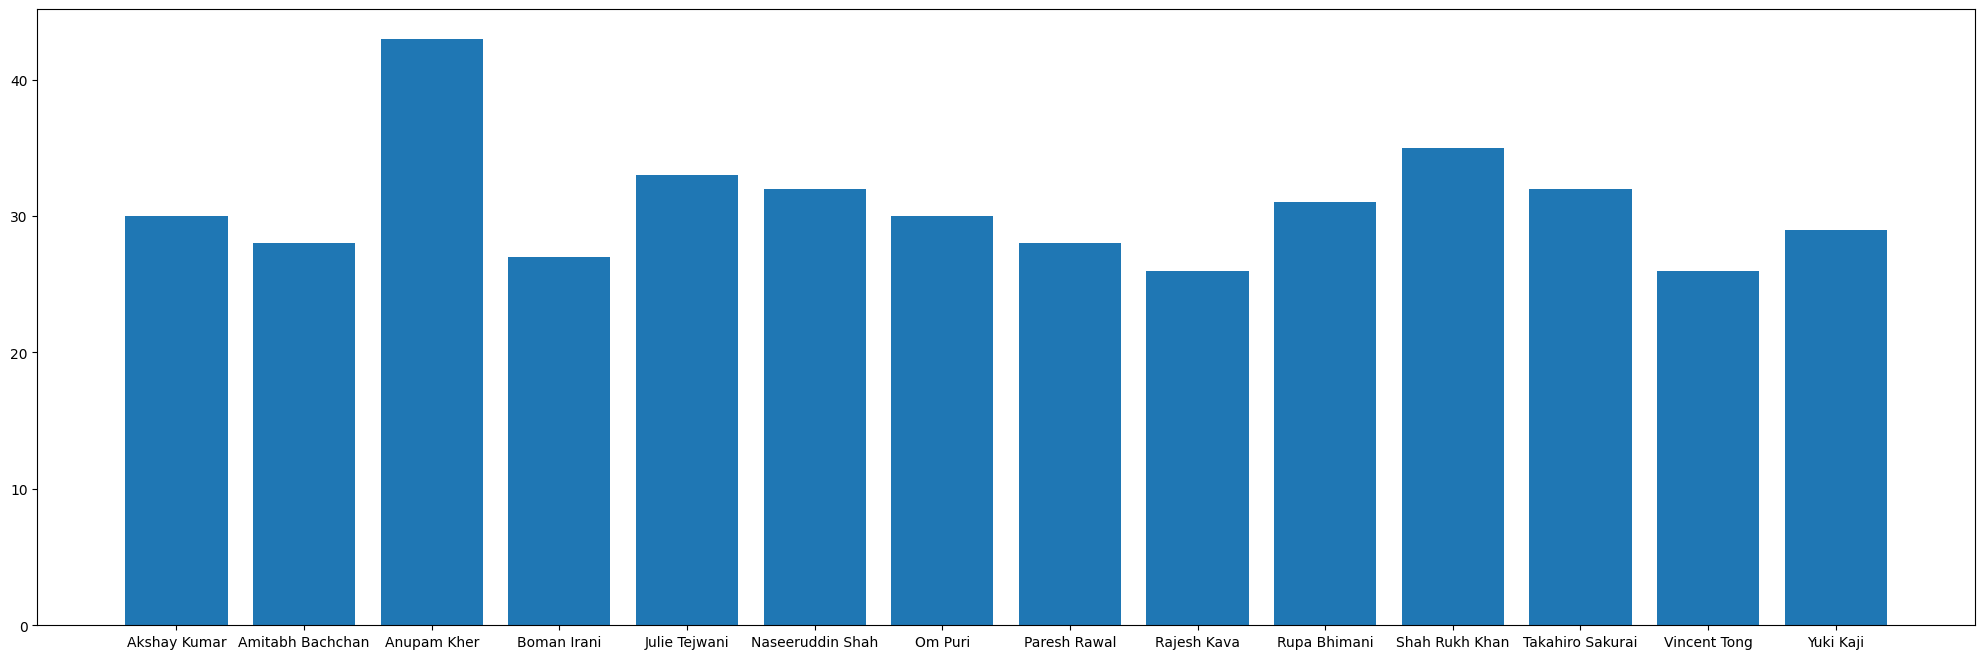

In [19]:
counted_directors = count_dict_values(3)
counted_actors = count_dict_values(4)

filtered_directors = filter_dict(counted_directors, 10)
filtered_actors = filter_dict(counted_actors, 25)

print("TOP Directors:")
show_bar(filtered_directors, 25, 8)
print("TOP Actors:")
show_bar(filtered_actors, 25, 8)

6.2 Map collaboration networks among actors and directors(actors -> directors).

!Дані відображені в урізаному форматі для легкого розуміння 
(прогрузити картину повністю можна забравши функцію "filtered_all_collaborations")

Відображені актори та продюсери з найширшим колом знайомств
Досить очікуваним є картинка зв'язків у цій сфері, всі знають всіх

Знайомства між продюсерами та акторами


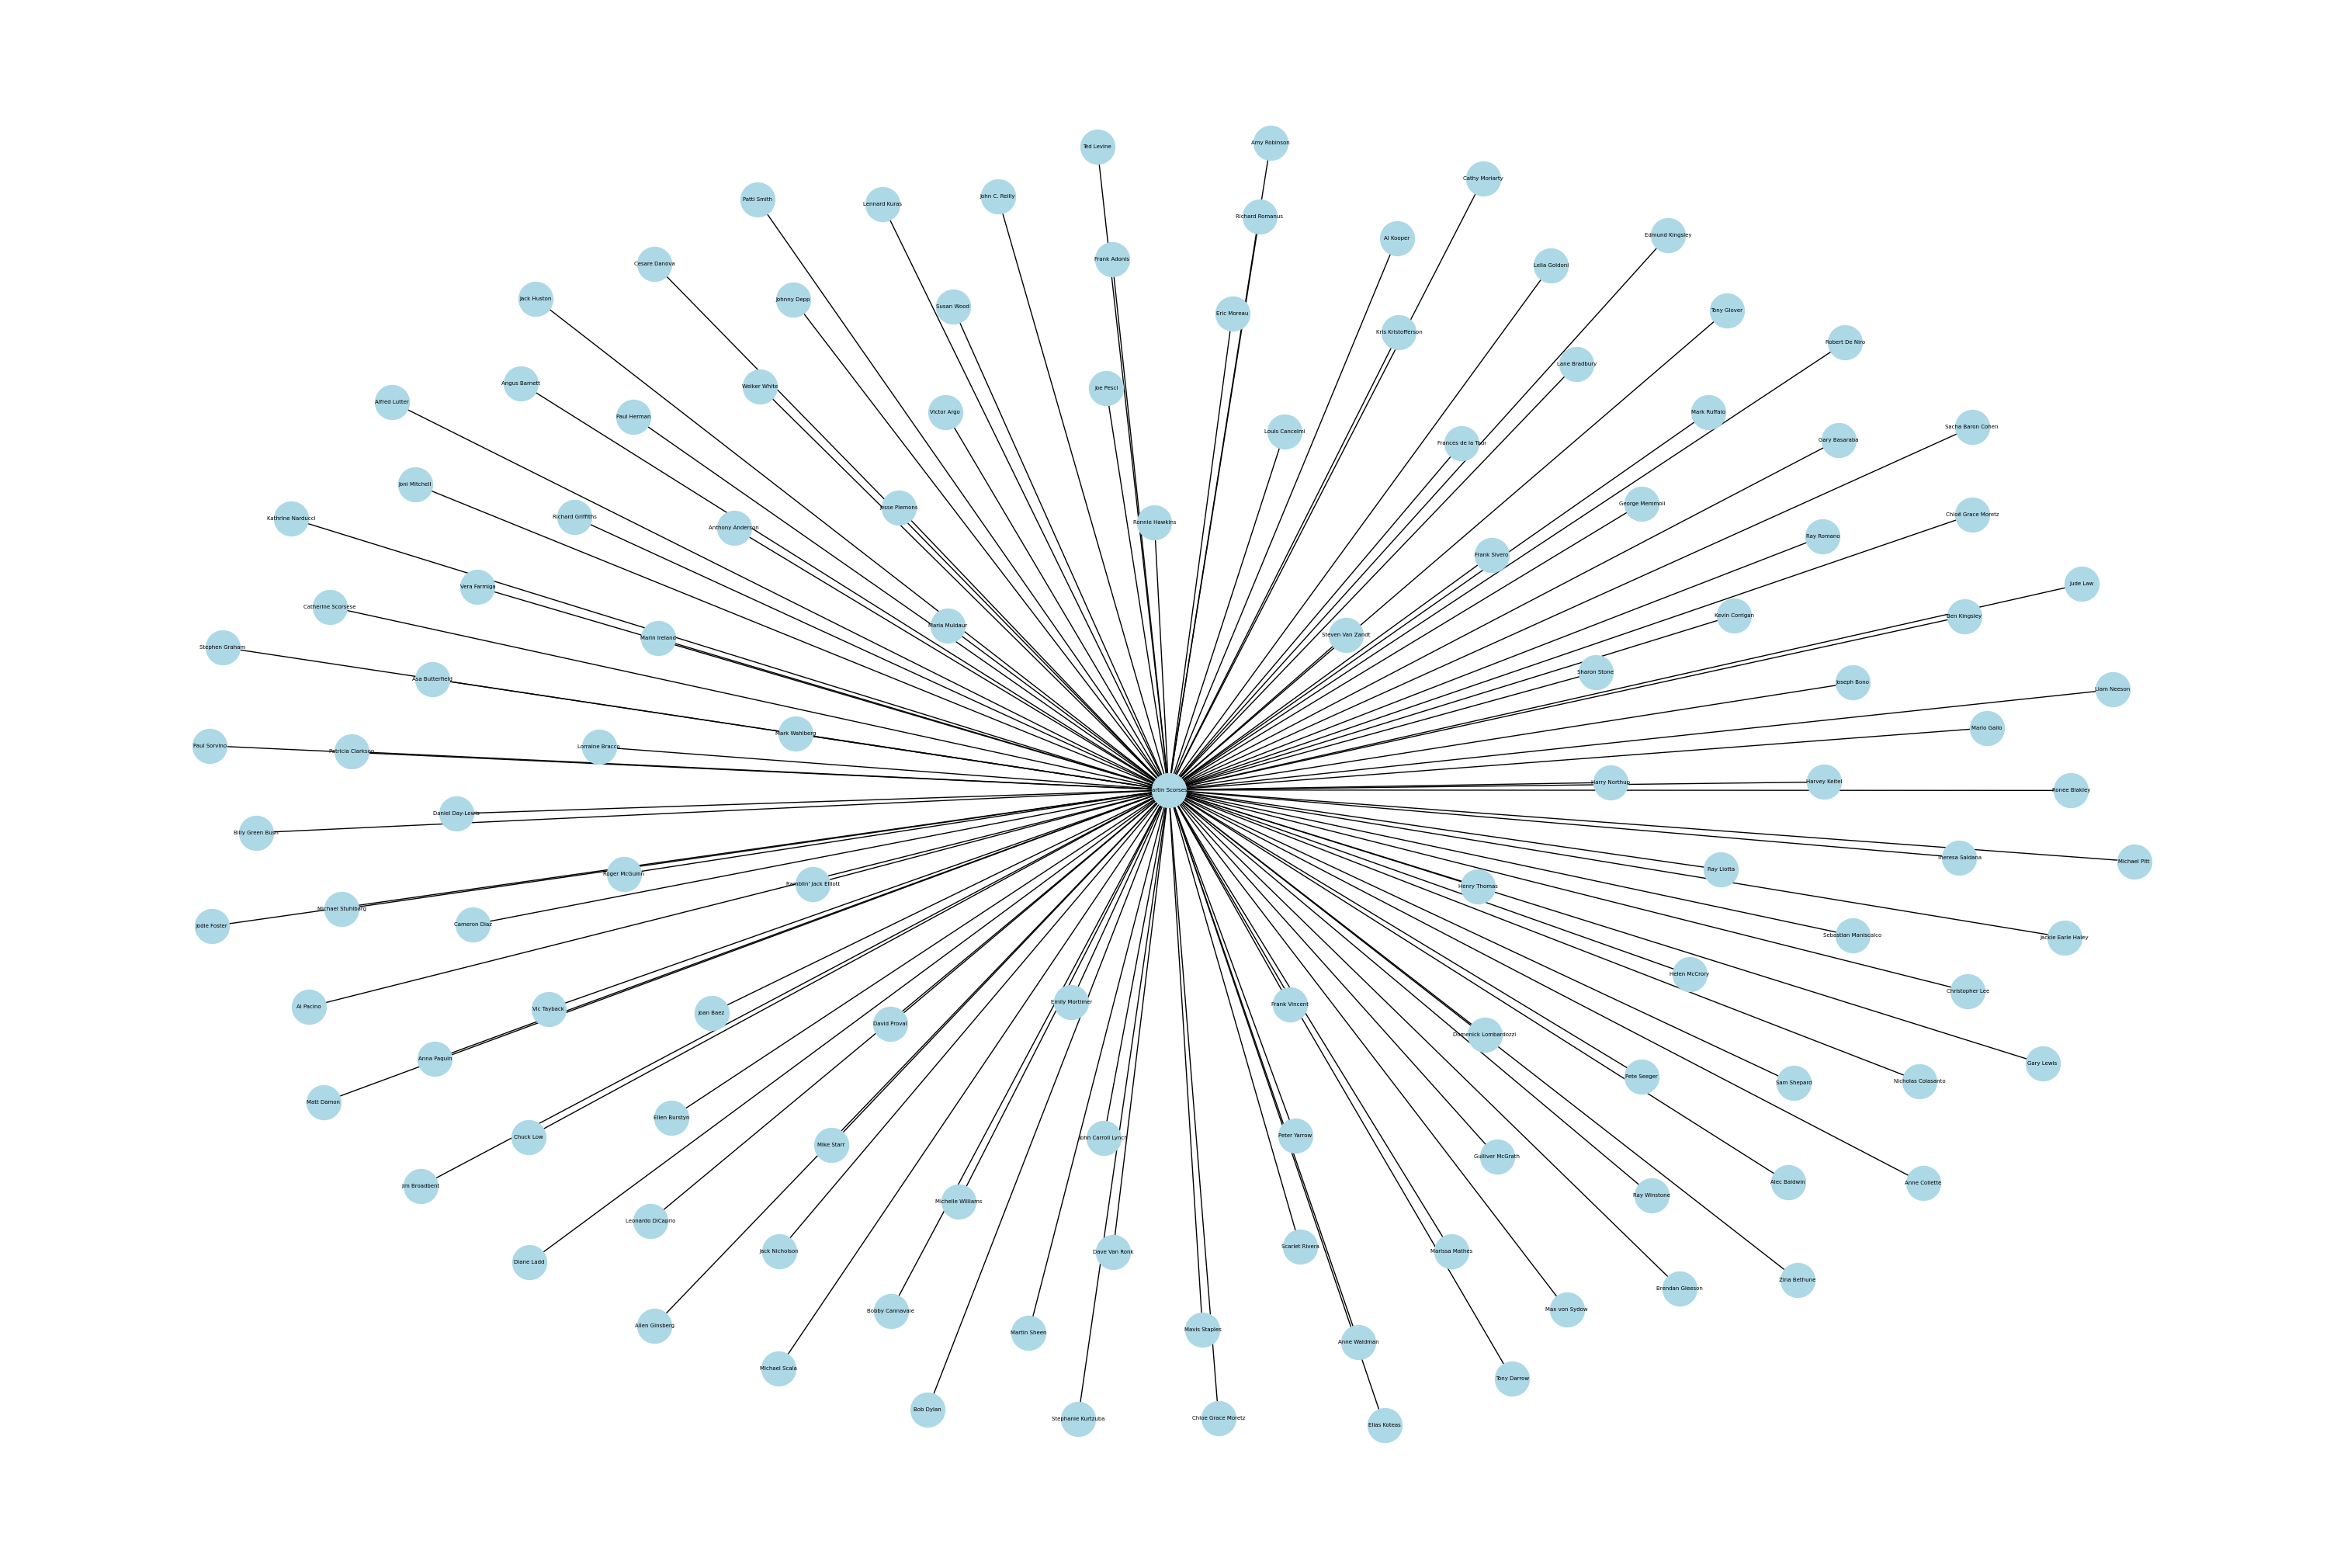

In [20]:
collaborations = {}

for x in netflix_dataset_list:
    if len(x[3]) != 0 and len(x[4]) != 0:
        directors = x[3].split(', ')
        casts = x[4].split(', ')
        for y in directors:
            heavy_dict(y, collaborations, casts)


all_collaborations = {director: list(set(actors)) for director, actors in collaborations.items()}
filtered_all_collaborations = dict(filter(lambda item: len(item[1]) > 120, all_collaborations.items()))
# print(filtered_all_collaborations)

print("Знайомства між продюсерами та акторами")
mindmap(filtered_all_collaborations)

7.1 Determine the most popular genres on Netflix.

!Дані відображені в урізаному форматі для легкого розуміння 
(прогрузити картину повністю можна замінивши значення 500 на 0)

Відображені найпопулярніші жанри
З попередніх даних, що Interational Movies є найбільш популярним жанром для зйомки фільмів, відповідно він і є найбільш популярним серед всієї бібліотеки

Найбільш популярні жанри


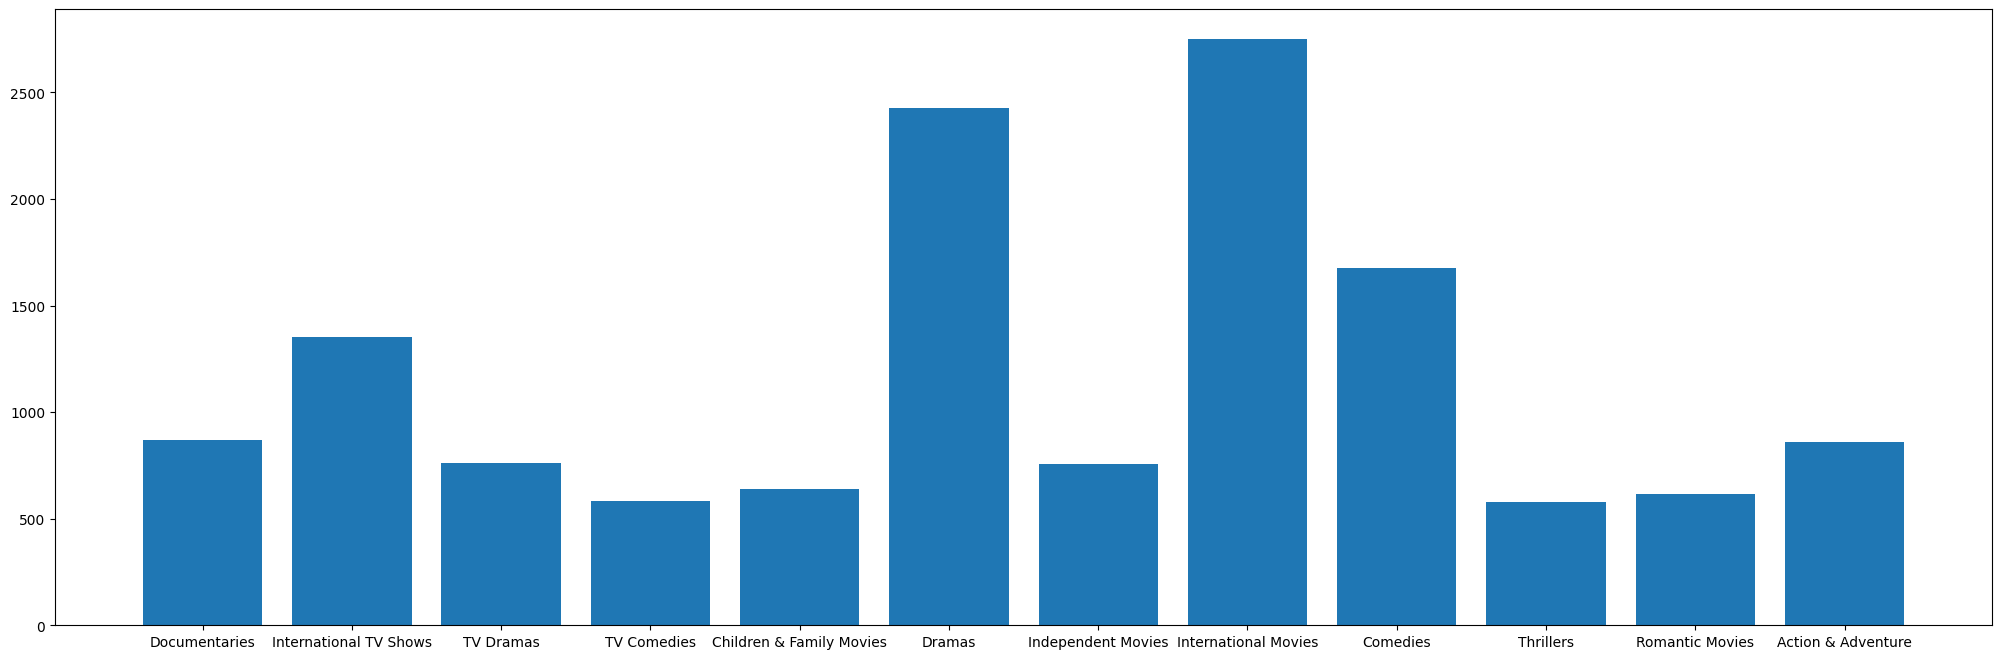

In [21]:
all_genres = [x[LISTED_IN].split(", ") for x in netflix_dataset_list]
calculated_genres = flat(all_genres)
dict_q_genres = dict(Counter(calculated_genres))

filtered_genres = dict(filter(lambda item: item[1] > 500, dict_q_genres.items()))

print("Найбільш популярні жанри")
show_bar(filtered_genres, 25, 8)

7.2 Investigate trends in genre popularity over time.
Можемо прослідкувати картину на скільки технічний прогрес з часом вплинув на розвиток індустрії і знову ж таки побачити, що найбільш популярним жанром є Interational Movies, бо його лінія має найстрімніше зростання

Тренди у зйомках різних жанрів по роках


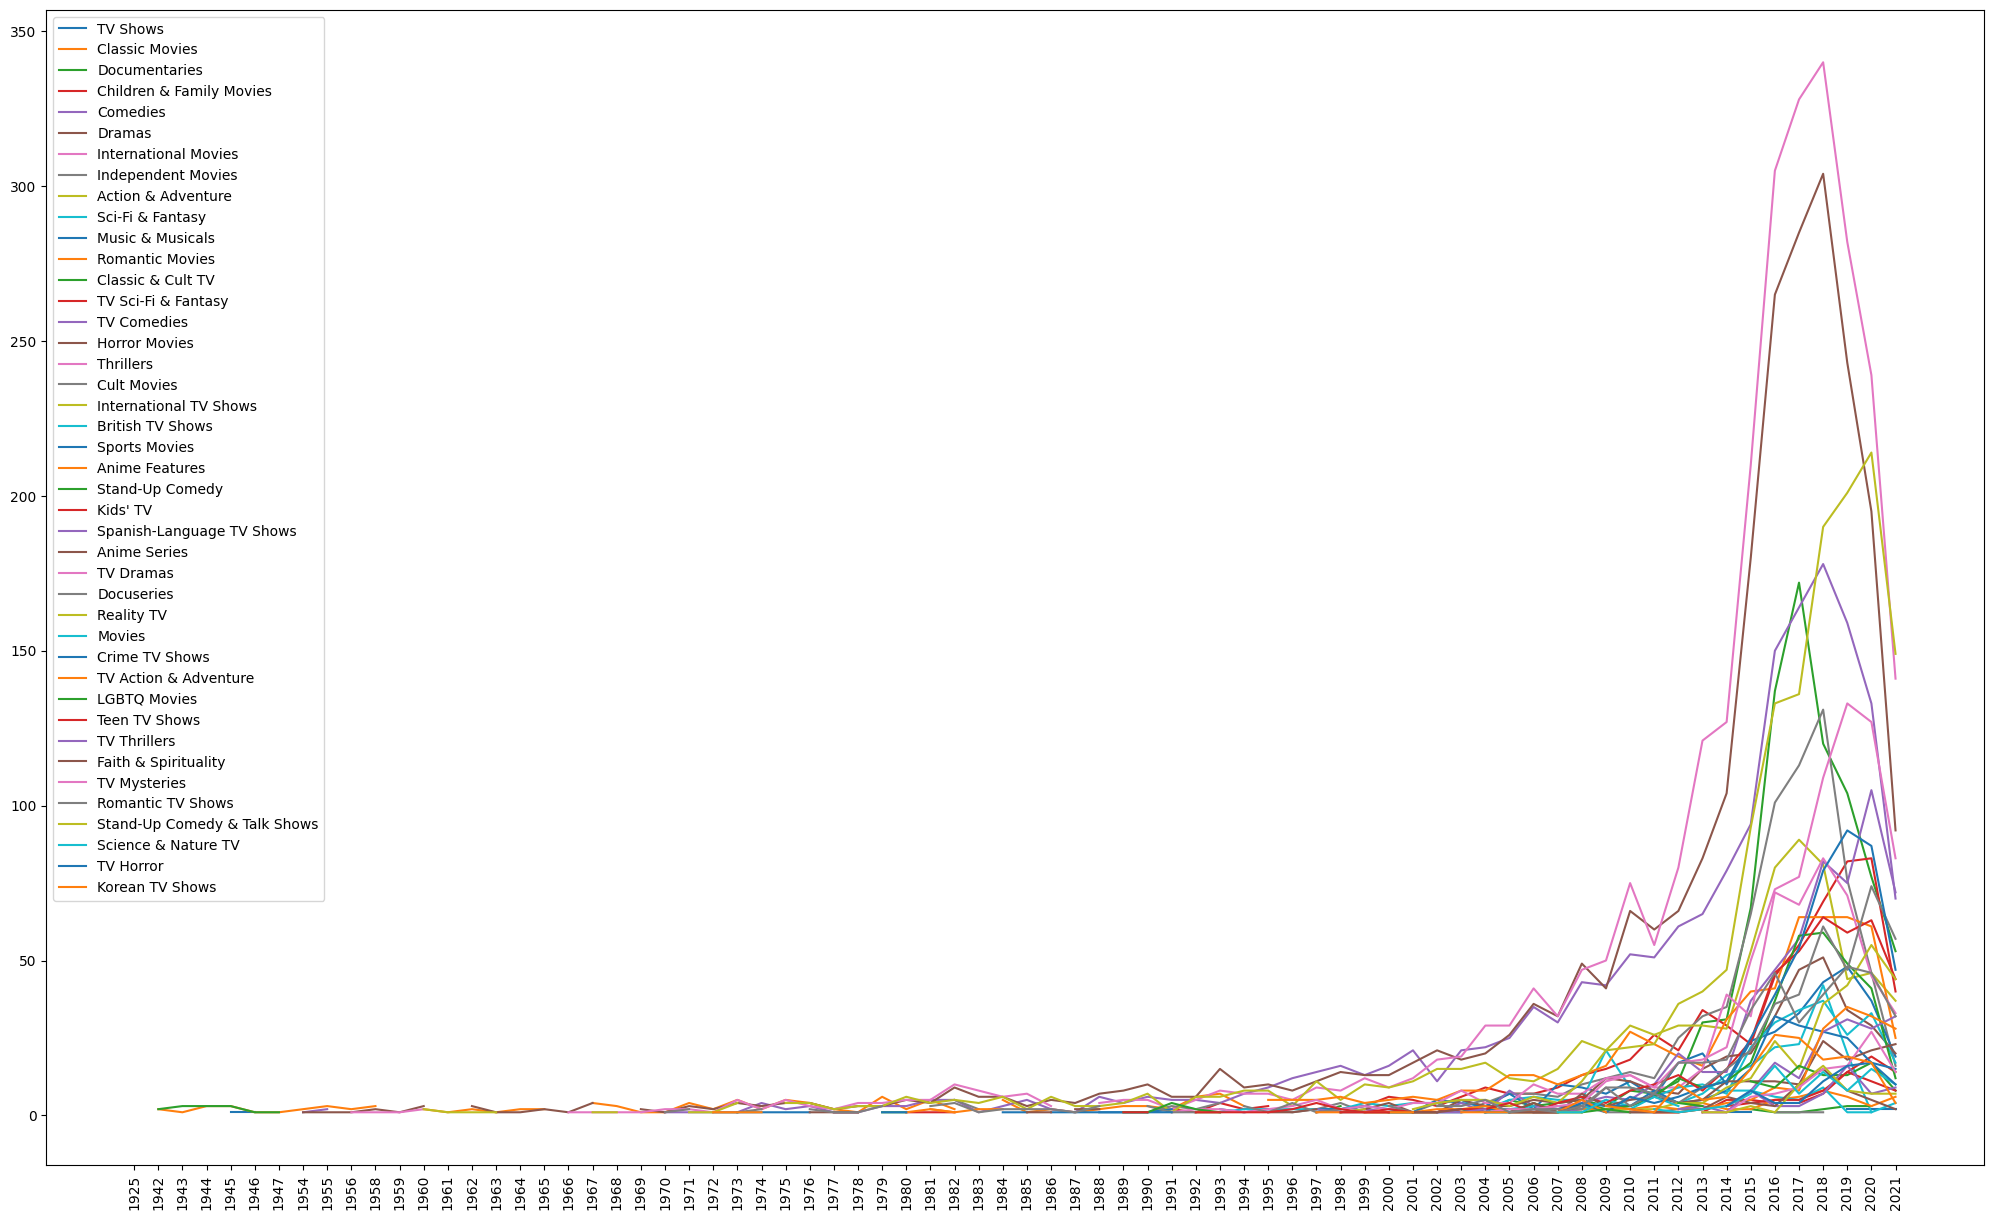

In [22]:
genres_by_year = {}

for x in netflix_dataset_list:
    if len(x[7]) != 0 and len(x[10]) != 0:
        all_genres_info = x[10].split(", ")
        heavy_dict(x[7], genres_by_year, all_genres_info)

nested_dict_genres = nested_calculated(genres_by_year)
# print(nested_dict_genres)
genres_year_sorted = key_data_sort(nested_dict_genres)
# print(genres_year_sorted)

print("Тренди у зйомках різних жанрів по роках")
linear_functions(genres_year_sorted)

8 Discover common keywords in titles and descriptions.

!Дані відображені в урізаному форматі для легкого розуміння 
(прогрузити картину повністю можна забравши функцію "filter_dict")

Відображені найпопулярніші жанри
Дуже очікуваною картиною є те, що найпопулярнішими словами у назвах та описі є артиклі 

Найбільш використовувані слова у описах та назвах


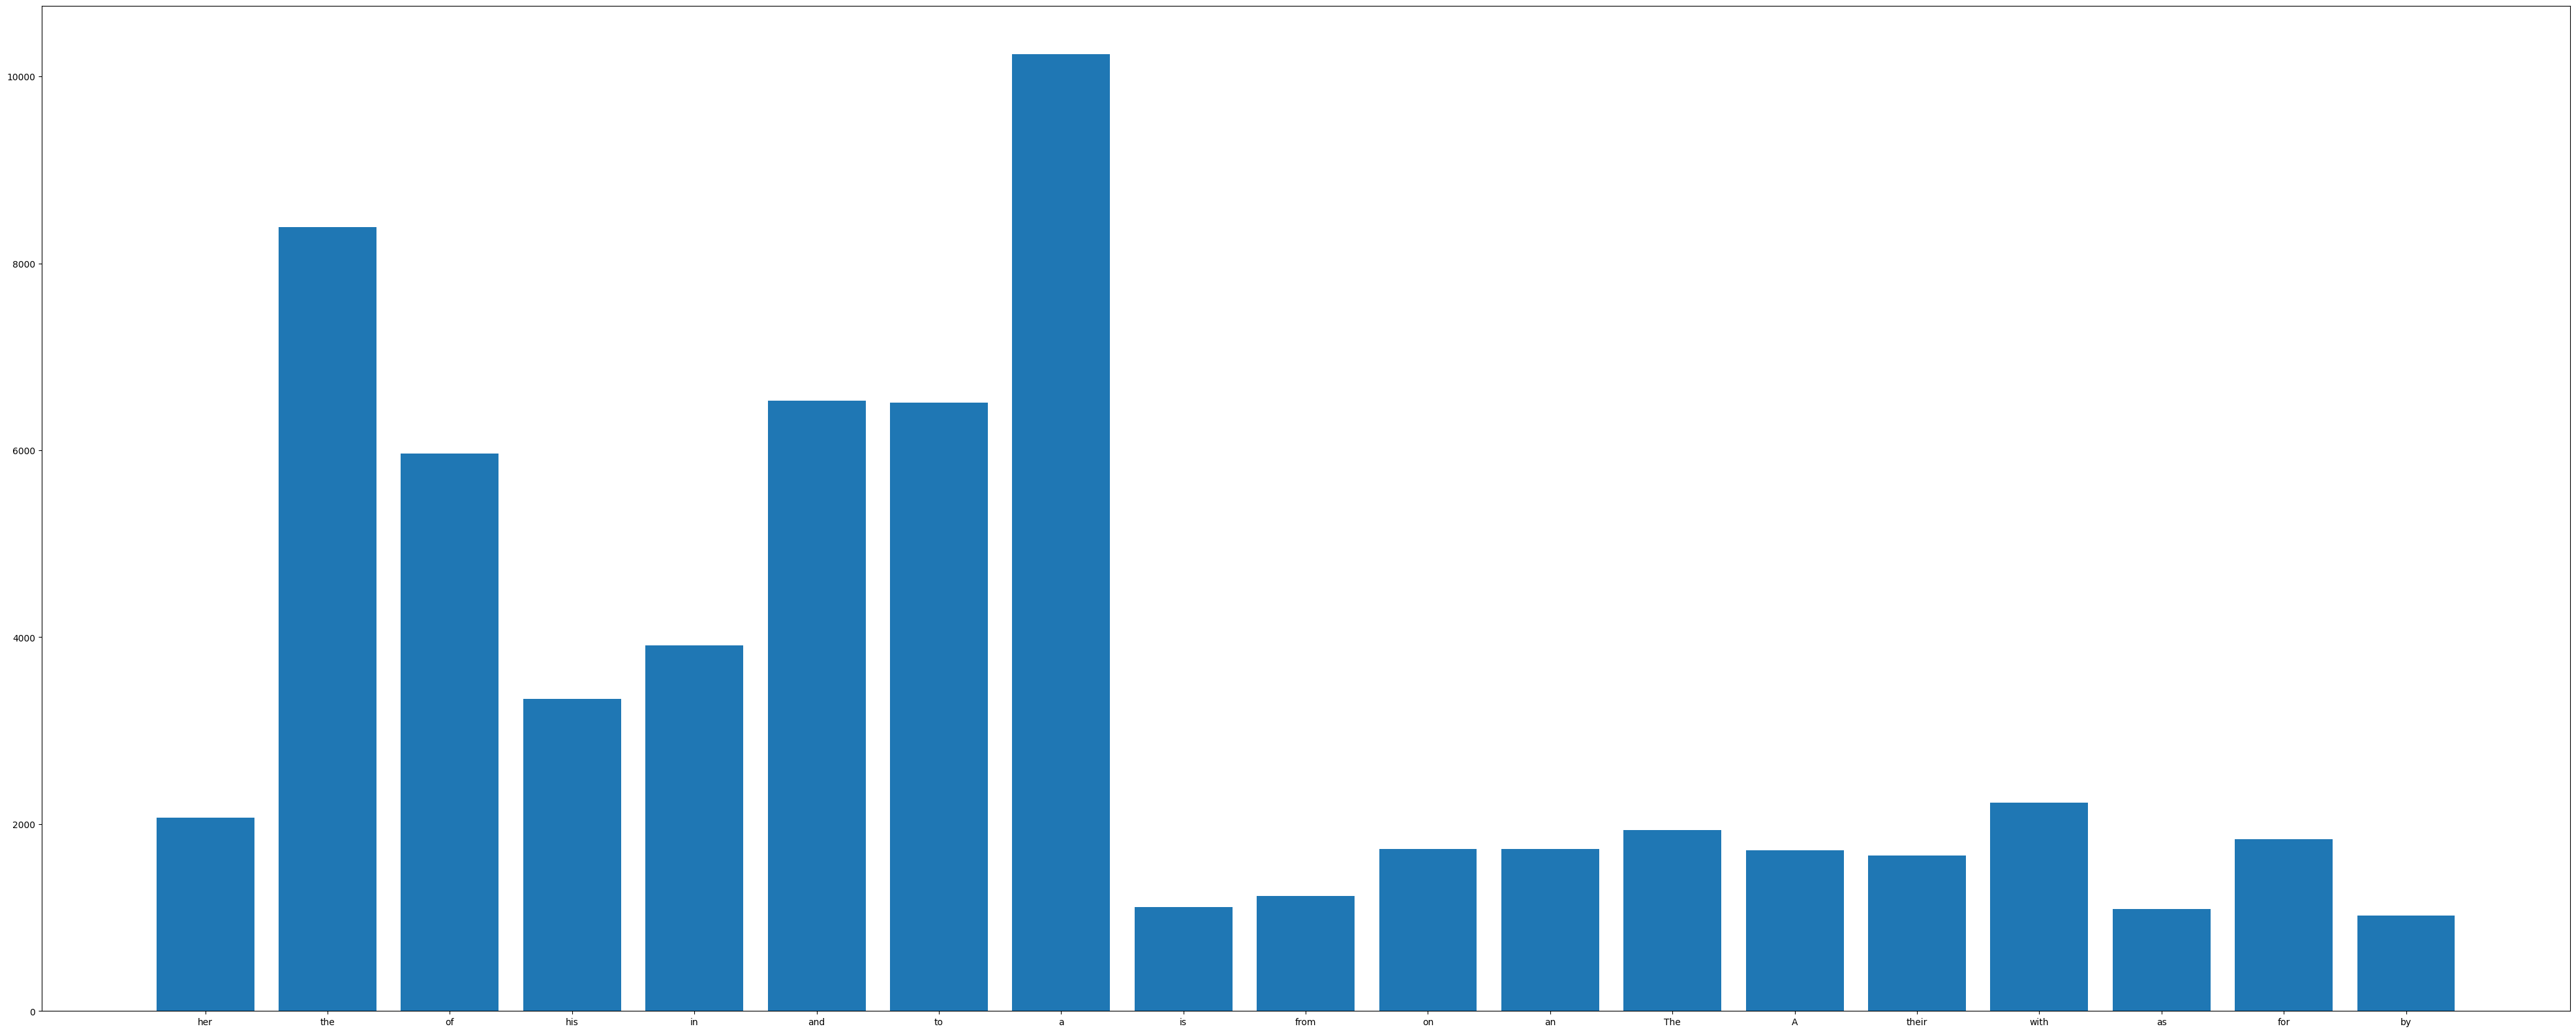

In [23]:
common_keywords = [[x[2].split(' '),x[11].split(' ')] for x in netflix_dataset_list if len(x[2]) != 0 and len(x[11]) != 0]
all_common_keywords = flat(common_keywords)
dict_q_keywords = dict(Counter(all_common_keywords))
filtered_keywords = filter_dict(dict_q_keywords,1000)
# print(filtered_keywords)

print("Найбільш використовувані слова у описах та назвах")
show_bar(filtered_keywords, 50, 20)

9.1 Examine seasonality in adding new content (e.g., more content added during certain months).
Бачимо, що розподіл досить звичайний, не має сильних скачків, найбільше контенту додавалося саме у період весни-літа

Розподіл додавання нового контенту по місяцях


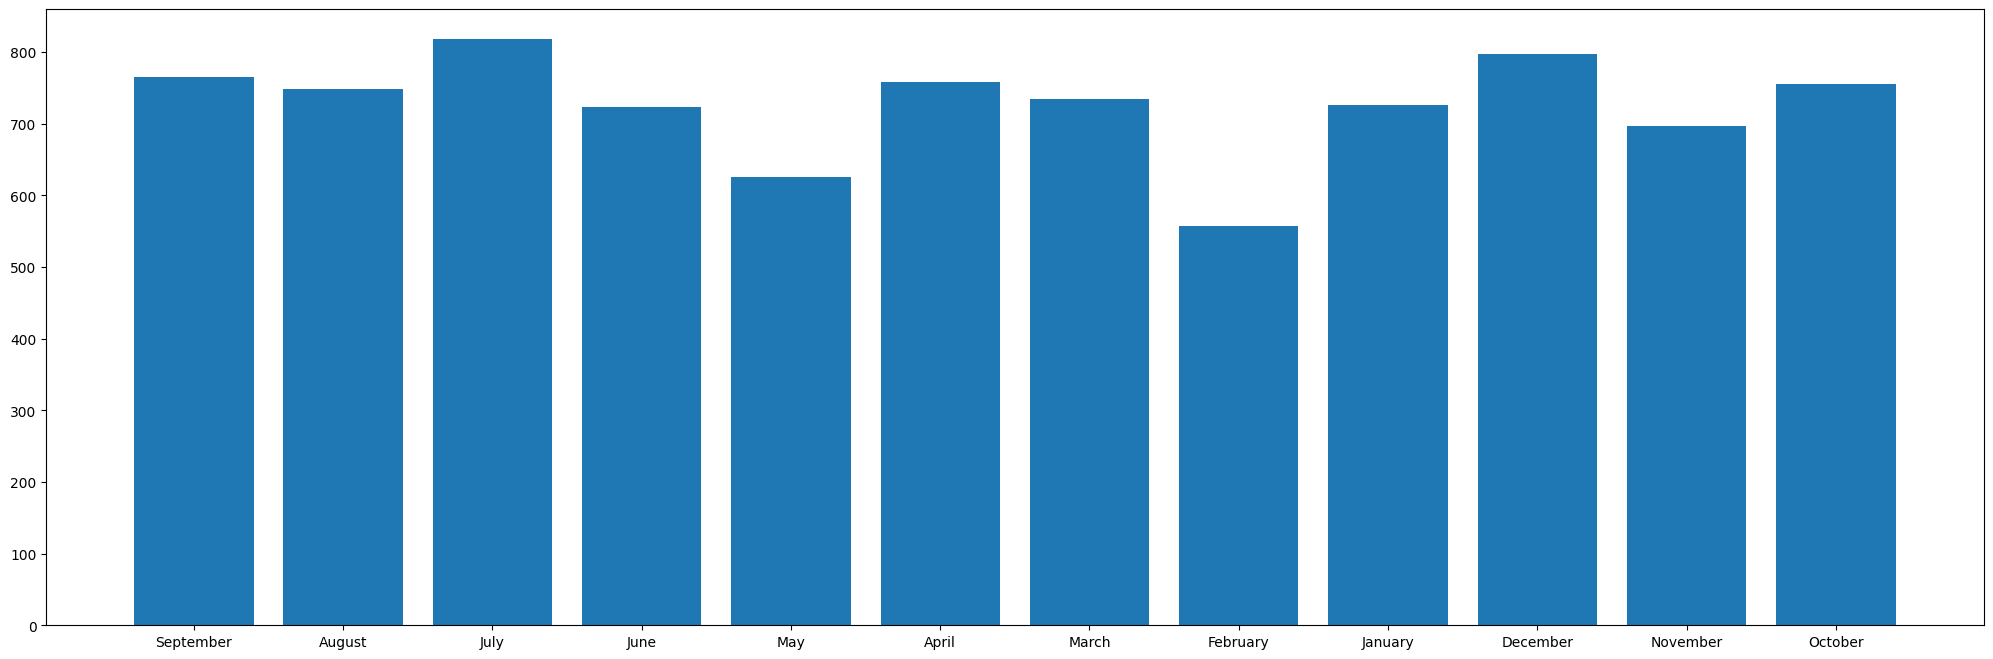

In [24]:
season_added = {}
for x in netflix_dataset_list:
    date_splited = x[DATE_ADDED].split(' ')
    if len(x[TYPE]) != 0 and len(date_splited[0]) != 0:
        simple_dict(season_added, date_splited[0])           
# print(season_added)

print("Розподіл додавання нового контенту по місяцях")
show_bar(season_added, 25, 8)

9.2 Analyze trends in the growth of Netflix’s library over time.
2019 є роком коли випустили найбільше контенту, тому очікувано, що саме тоді і додали найбільше до бібліотеки, спад знову ж таки можна виправдати covid-19

Розподіл зростання контенту по роках


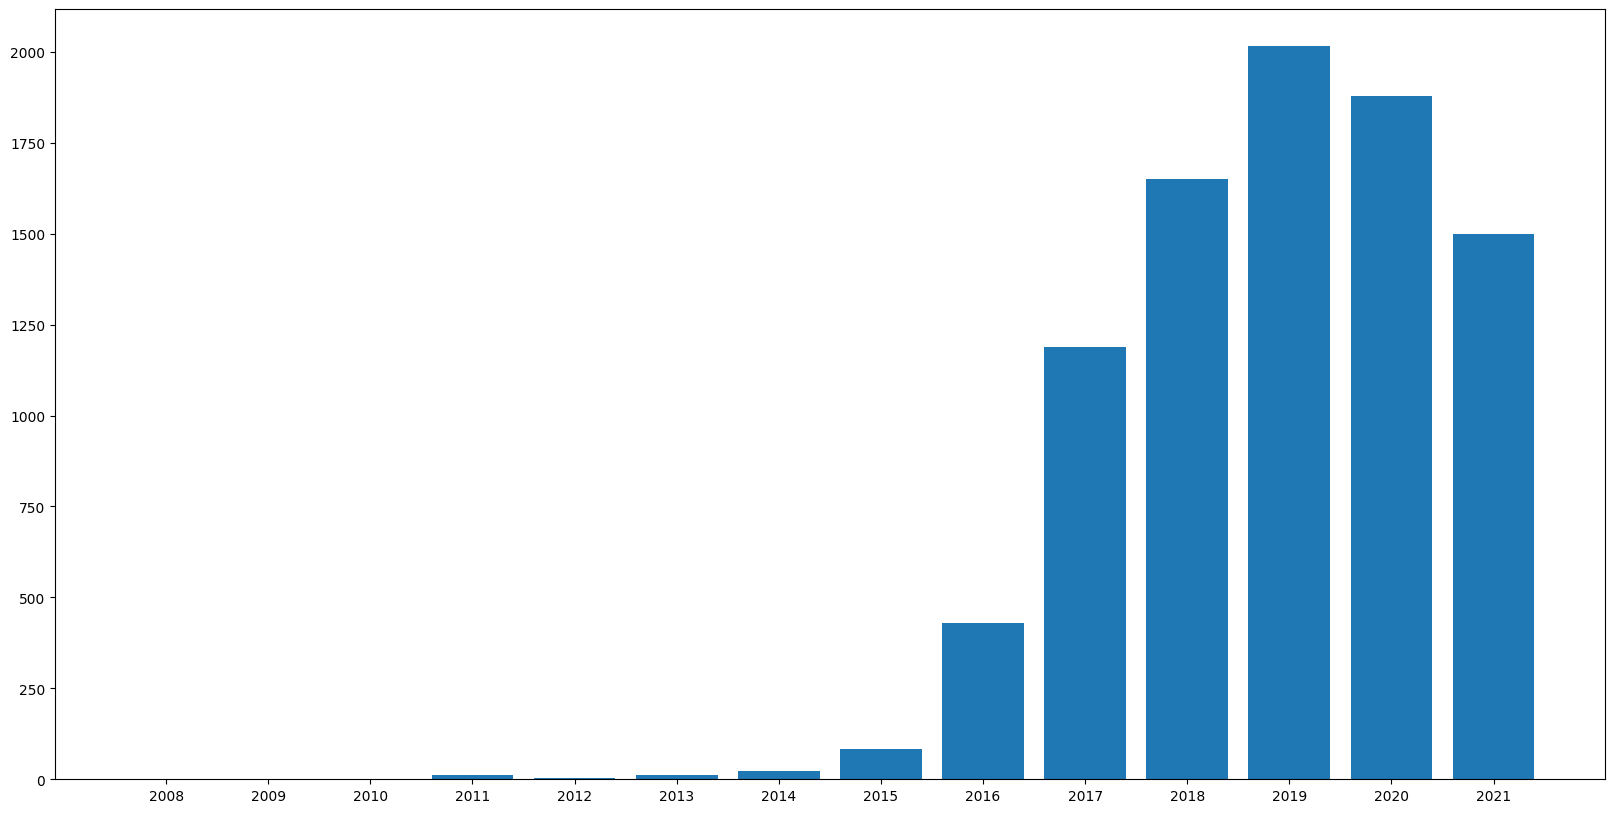

In [25]:
growth_trend = {}
for x in netflix_dataset_list:
    date_splited1 = x[DATE_ADDED].split(', ')
    if len(x[TYPE]) != 0 and len(date_splited1[0]) != 0:
        simple_dict(growth_trend, date_splited1[1])

growth_trend_sorted = key_data_sort(growth_trend)
# print(growth_trend_sorted)

print("Розподіл зростання контенту по роках")
show_bar(growth_trend_sorted, 20, 10)

10.1 Explore correlations between the duration of shows/movies and their ratings

Кореляція між довжиною серіалів та їх рейтиграми


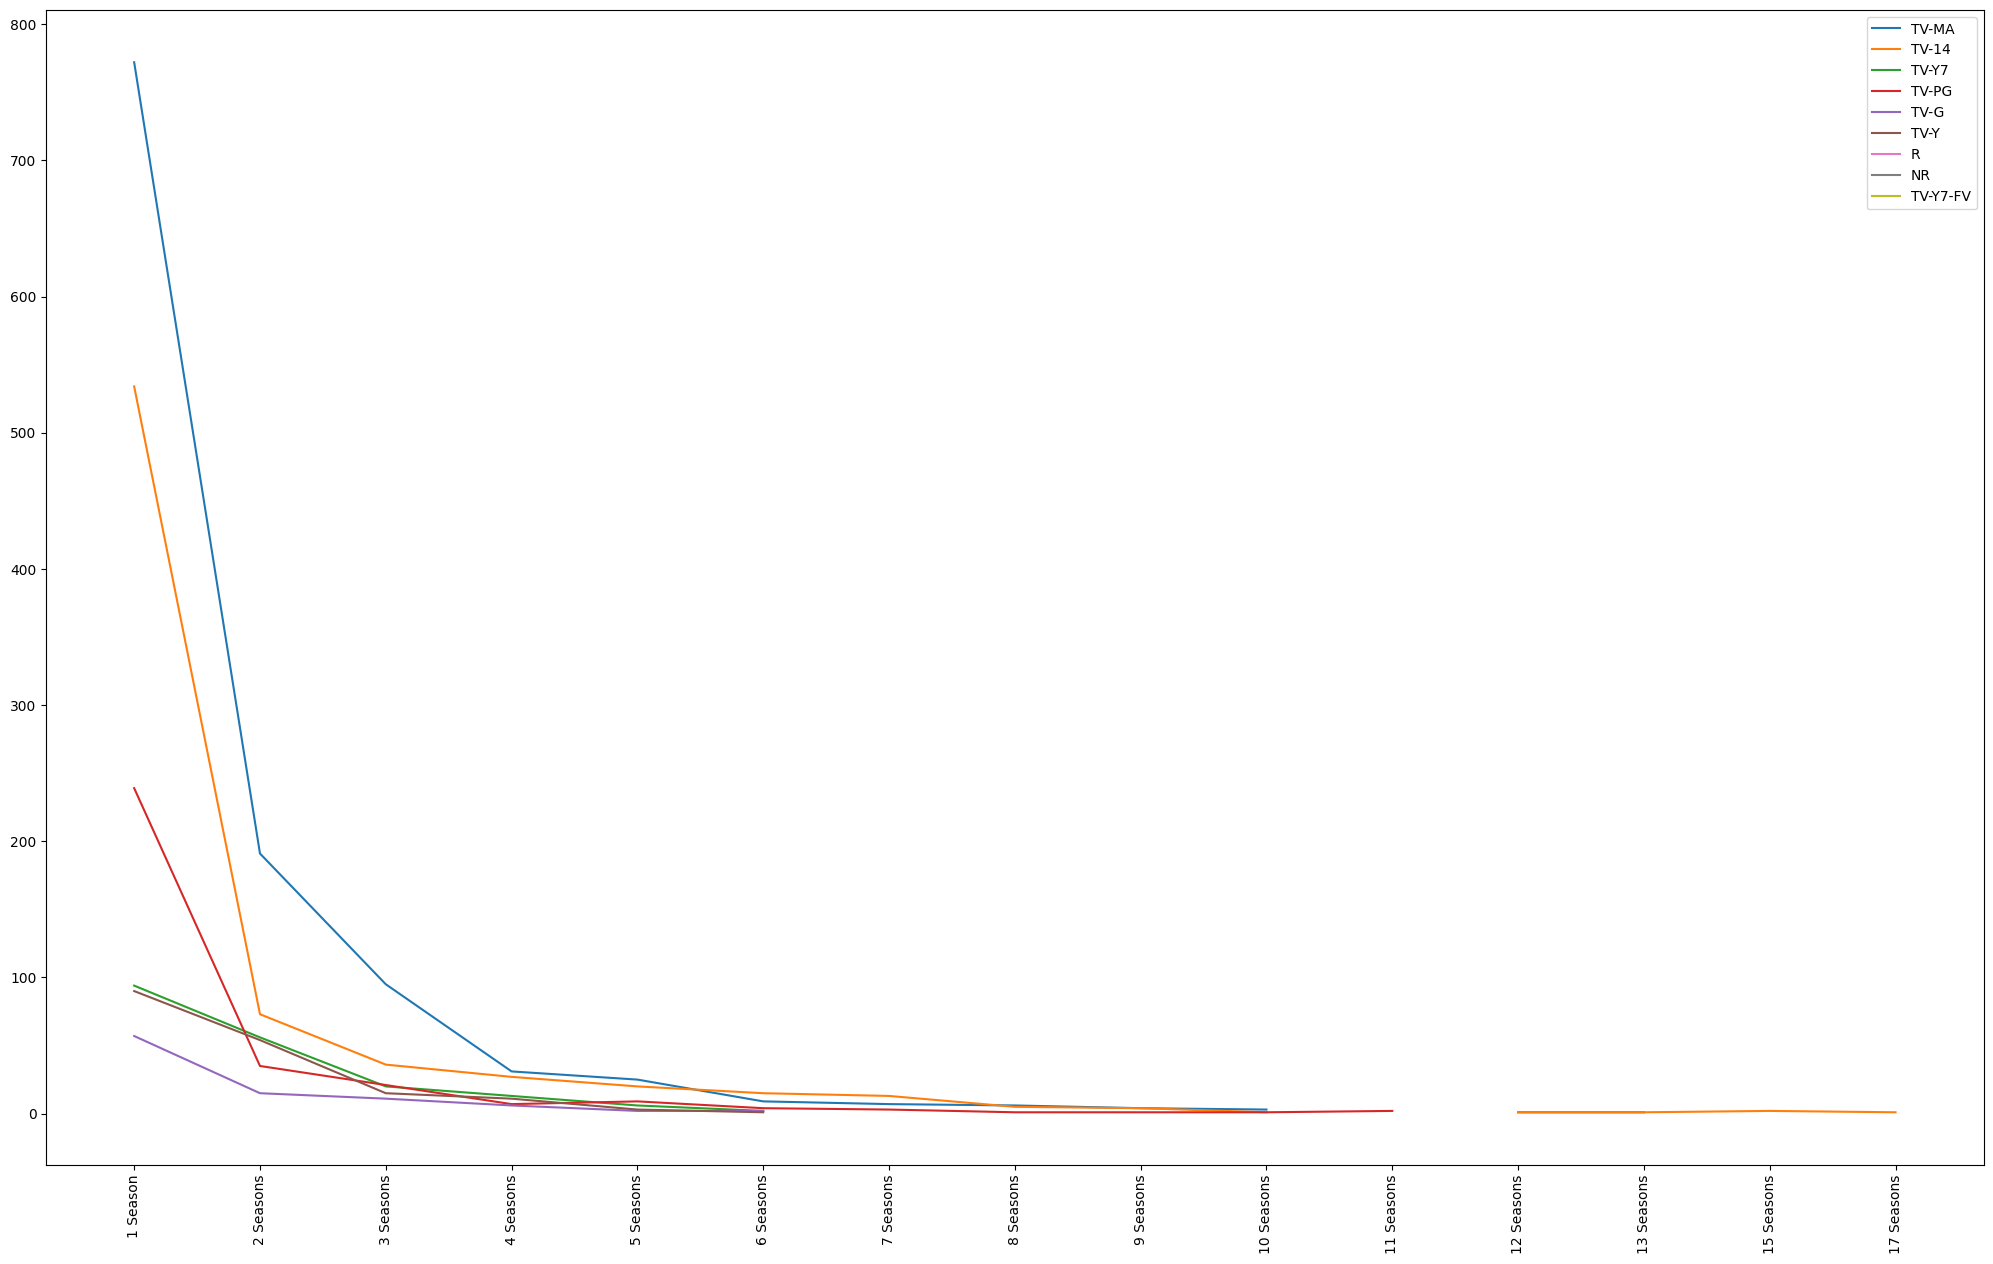

Кореляція між довжиною фільмів та їх рейтиграми


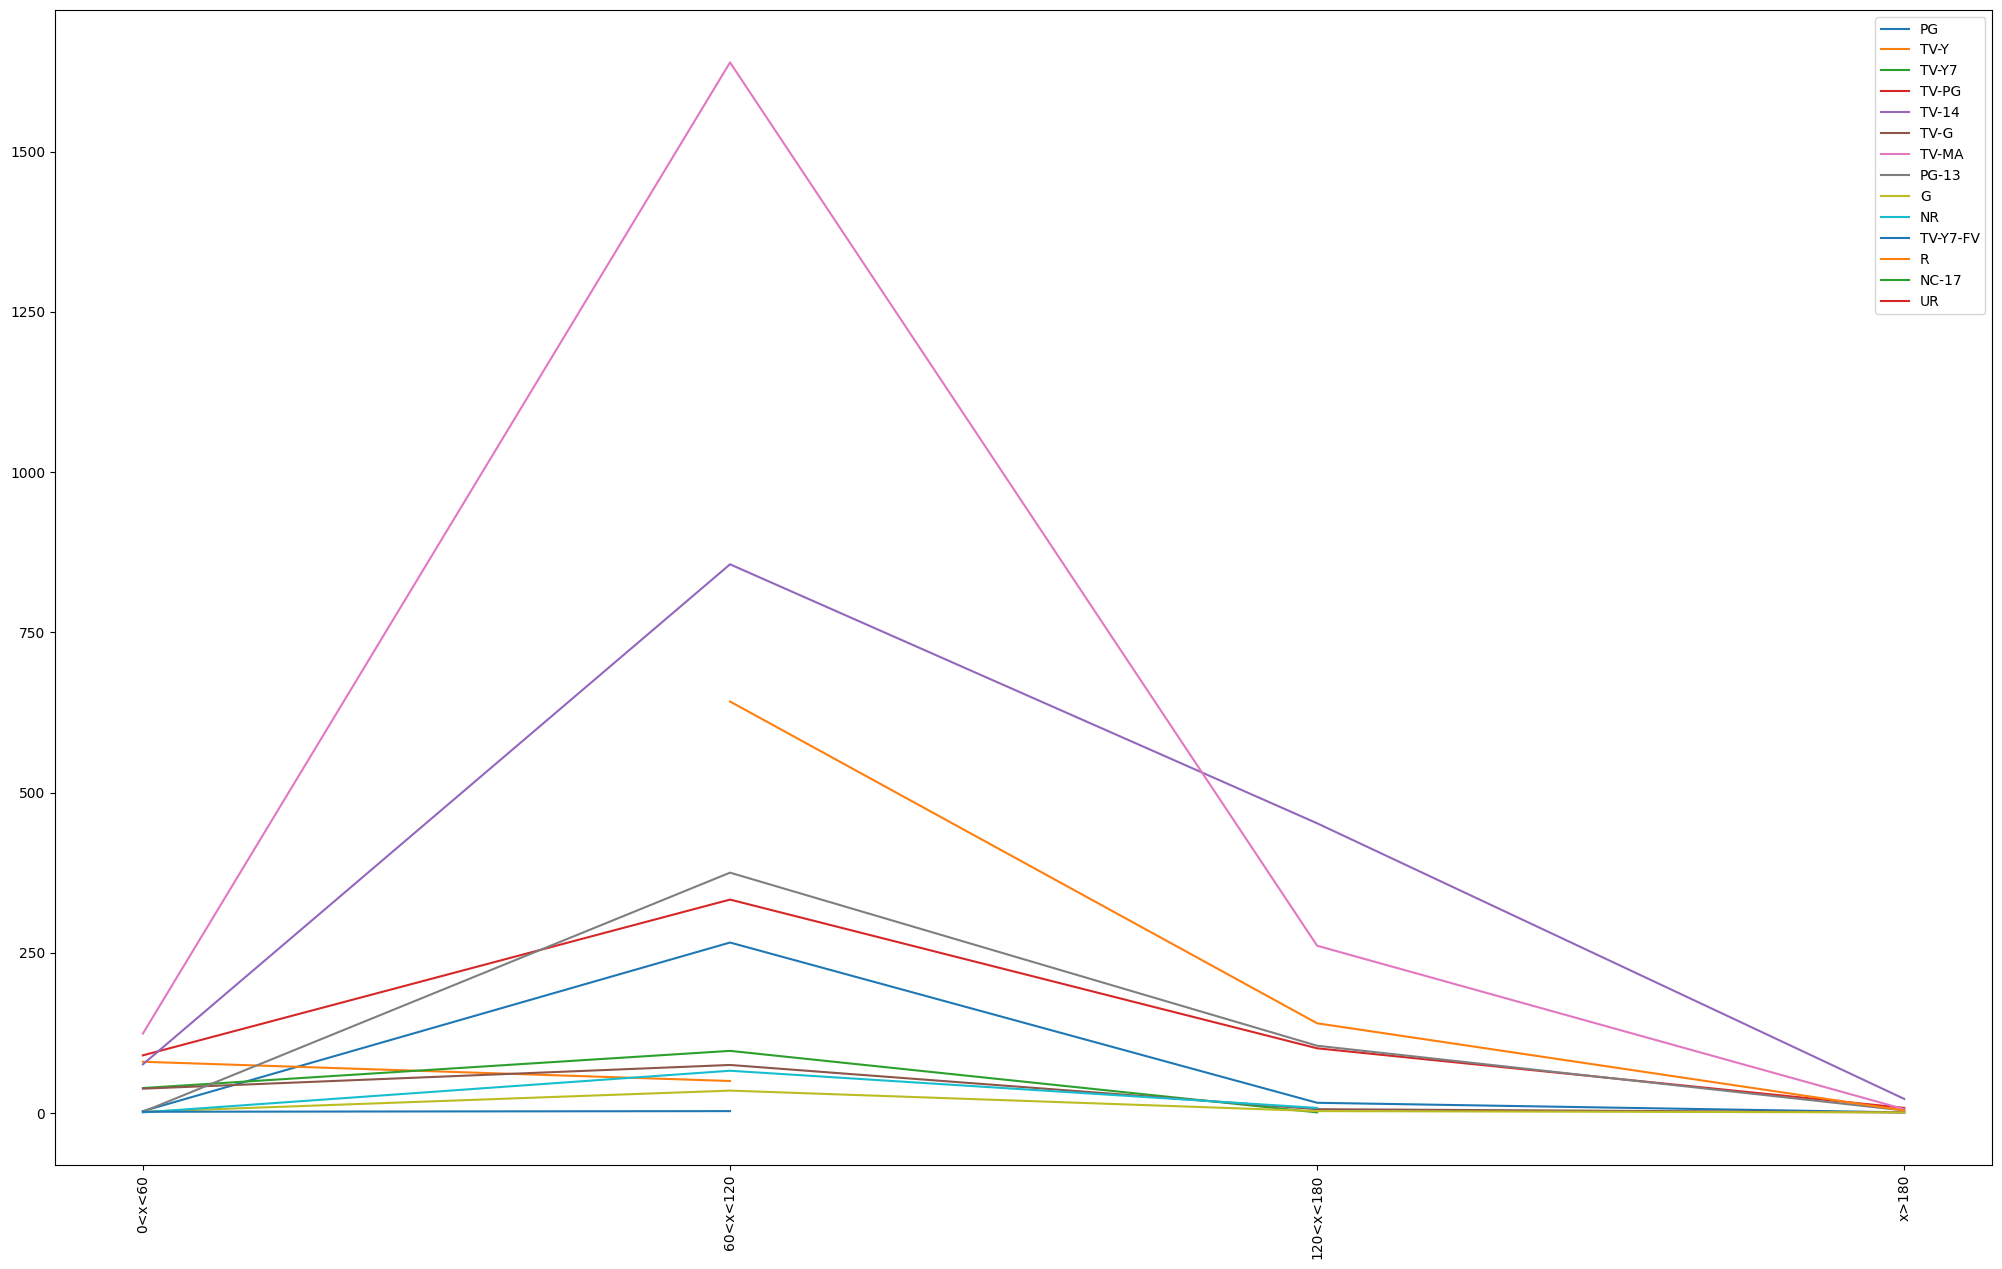

In [26]:
show_lenght = {}

for x in netflix_dataset_list:
    if len(x[1]) != 0 and x[1] == "TV Show" and len(x[8]) != 0:
        simple_info_dict(show_lenght, x[9], x[8])

nested_calc_show_lenght = nested_calculated(show_lenght)
sorted_calc_show_lenght = dict(sorted(nested_calc_show_lenght.items(), key=lambda x: int(x[0].split()[0])))
# print(sorted_calc_show_lenght)
print("Кореляція між довжиною серіалів та їх рейтиграми")
linear_functions(sorted_calc_show_lenght)

movie_lenght = {
    "0<x<60": [],
    "60<x<120": [],
    "120<x<180": [],
    "x>180": []
}
for x in netflix_dataset_list:
    if len(x[1]) != 0 and x[1] == "Movie" and len(x[9]) != 0 and len(x[8]) != 0:
        time = int(x[9].replace('min',''))
        if time > 0 and time < 60:
            movie_lenght["0<x<60"].append(x[8])
        elif time > 60 and time < 120:
            movie_lenght["60<x<120"].append(x[8])
        elif time > 120 and time < 180:
            movie_lenght["120<x<180"].append(x[8])
        elif time > 180:
            movie_lenght["x>180"].append(x[8])

nested_calc_movie_lenght = nested_calculated(movie_lenght)
print("Кореляція між довжиною фільмів та їх рейтиграми")
linear_functions(nested_calc_movie_lenght)

10.2 Investigate the relationship between the release year of content and its popularity or rating.

Кореляція між датою випуску та рейтиграми контенту


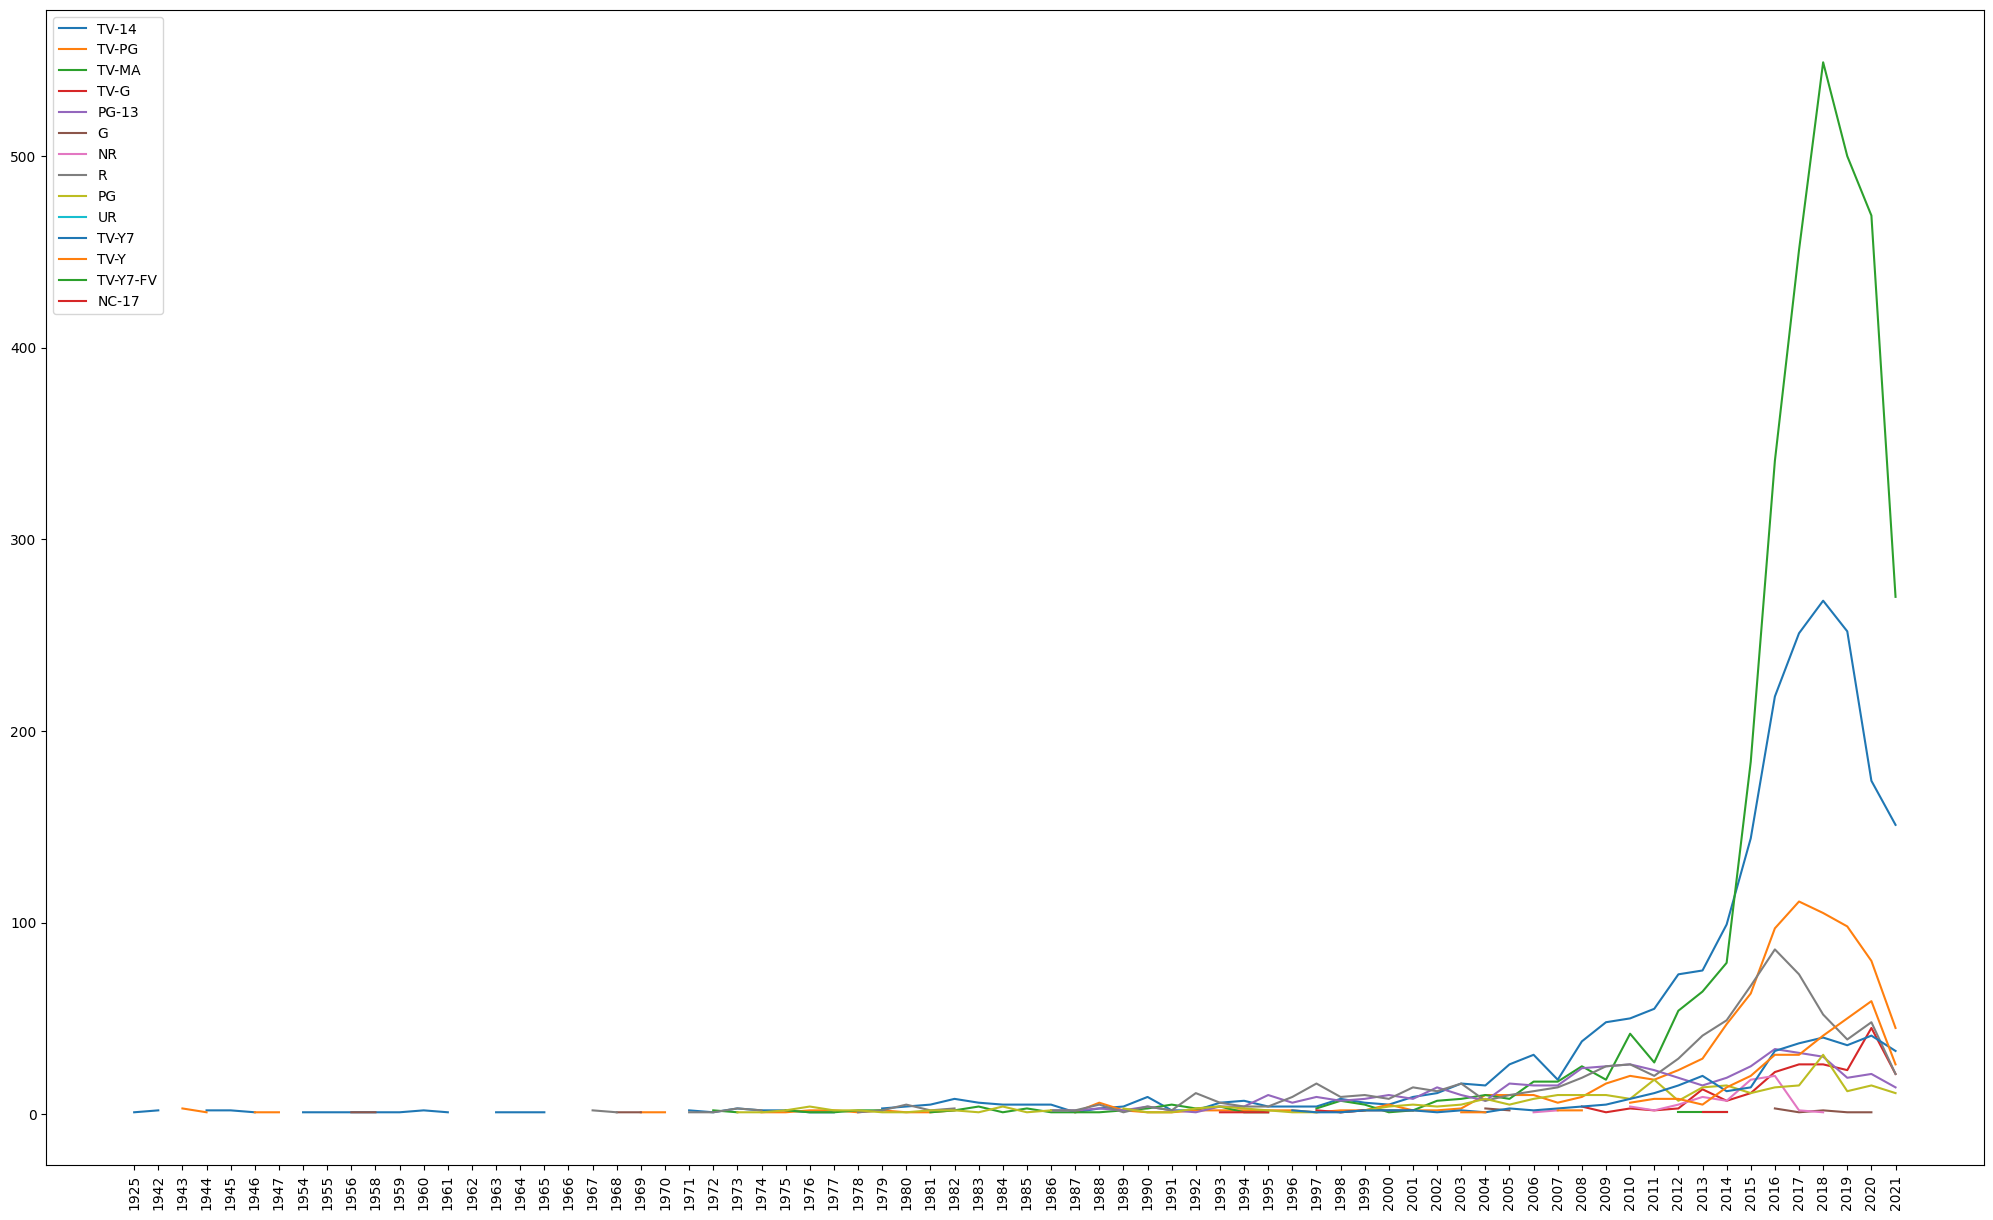

In [27]:
correlation = {}

for x in netflix_dataset_list:
    if len(x[7]) != 0 and len(x[8]) != 0 and "min" not in x[8]:
        simple_info_dict(correlation, x[7], x[8])
# print(correlation)
sorted_nested_calc_correlation = key_data_sort(nested_calculated(correlation))
# print(sorted_nested_calc_correlation)
print("Кореляція між датою випуску та рейтиграми контенту")
linear_functions(sorted_nested_calc_correlation)

Рефлексія після закінчення роботи:

Завдяки комплексному аналізу бази даних Netflix я зміг визначити потрібну мені інформацію для виконання завдань. 

Неочікувано для мене, найбільше я користувався саме словниками, вони дійсно неймовірно зручні для збереження необхідної інформації. Витягувати дані можна було імпортованими бібліотеками, але я вирішив використуваючи всі знання отримані під час курсу ОП та діставати їх класичним кодом, а самі бібліотеки використовувати лише для візуалізації отриманих даних.

Також відкриттям для мене за цю роботу став jupiter, бо насправді процес пришвидшується, коли результат твого коду виводиться не в терміналі а одразу під написаним кодом.